1% progress: Training Loss = 7.944059
2% progress: Training Loss = 7.882737
3% progress: Training Loss = 7.877229
4% progress: Training Loss = 7.876762
5% progress: Training Loss = 7.876723
6% progress: Training Loss = 7.876720
7% progress: Training Loss = 7.876720
8% progress: Training Loss = 7.876720
9% progress: Training Loss = 7.876720
10% progress: Training Loss = 7.876720
11% progress: Training Loss = 7.876720
12% progress: Training Loss = 7.876720
13% progress: Training Loss = 7.876720
14% progress: Training Loss = 7.876720
15% progress: Training Loss = 7.876720
16% progress: Training Loss = 7.876720
17% progress: Training Loss = 7.876720
18% progress: Training Loss = 7.876720
19% progress: Training Loss = 7.876720
20% progress: Training Loss = 7.876720
21% progress: Training Loss = 7.876720
22% progress: Training Loss = 7.876720
23% progress: Training Loss = 7.876720
24% progress: Training Loss = 7.876720
25% progress: Training Loss = 7.876720
26% progress: Training Loss = 7.87

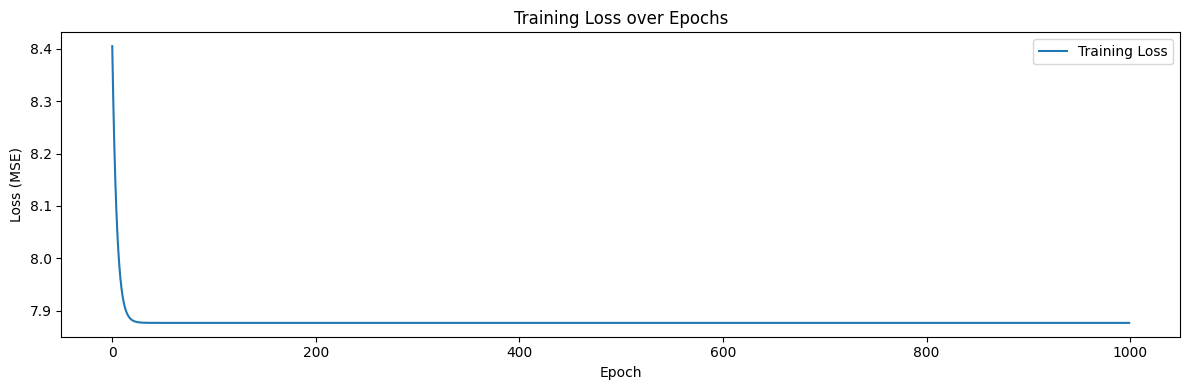

In [31]:
#Neural Network with Sigmoid and AdaGrad:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, learning_rate, num_epochs):
        num_samples = len(x)
        training_errors = []  # Store training errors

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y)** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                accumulated_gradients[i][0] + dweights ** 2,
                accumulated_gradients[i][1] + dbiases ** 2
                )

                self.weights[i] -= learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8) * dweights
                self.biases[i] -= learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

        # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}")

        return training_errors
        
input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 0.01
num_epochs = 1000
training_errors = model.train(x, y, learning_rate, num_epochs)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 8.573017
2% progress: Training Loss = 8.573017
3% progress: Training Loss = 8.573017
4% progress: Training Loss = 8.573017
5% progress: Training Loss = 8.573017
6% progress: Training Loss = 8.573017
8% progress: Training Loss = 8.573017
9% progress: Training Loss = 8.573017
10% progress: Training Loss = 8.573017
11% progress: Training Loss = 8.573017
12% progress: Training Loss = 8.573017
13% progress: Training Loss = 8.573017
15% progress: Training Loss = 8.573017
16% progress: Training Loss = 8.573017
17% progress: Training Loss = 8.573017
18% progress: Training Loss = 8.573017
19% progress: Training Loss = 8.573017
20% progress: Training Loss = 8.573017
21% progress: Training Loss = 8.573017
22% progress: Training Loss = 8.573017
23% progress: Training Loss = 8.573017
24% progress: Training Loss = 8.573017
25% progress: Training Loss = 8.573017
26% progress: Training Loss = 8.573017
27% progress: Training Loss = 8.573017
30% progress: Training Loss = 8.5

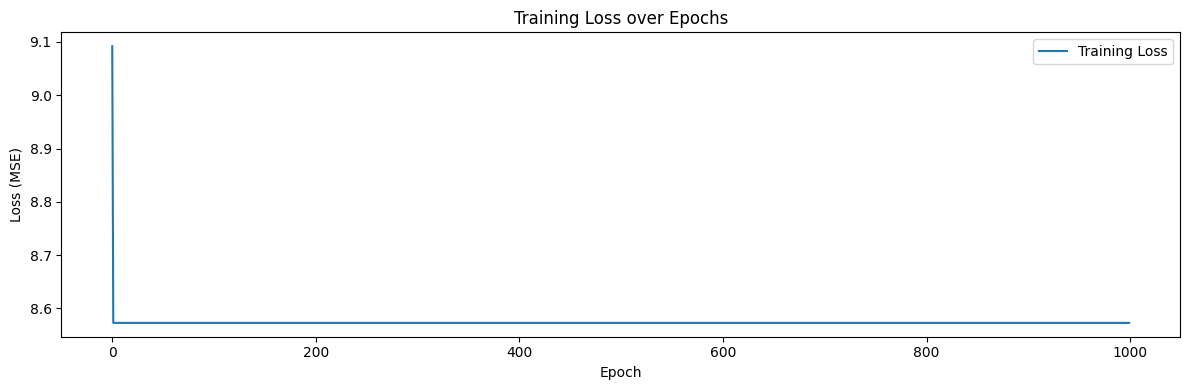

In [88]:
#Neural Network Using sigmoid and RMSProp:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, learning_rate, num_epochs):
        num_samples = len(x)
        training_errors = []  # Store training errors

        decay_rate = 0.9  # RMSProp decay rate
        epsilon = 1e-8  # Small constant to prevent division by zero

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    decay_rate * accumulated_gradients[i][0] + (1 - decay_rate) * (dweights ** 2),
                    decay_rate * accumulated_gradients[i][1] + (1 - decay_rate) * (dbiases ** 2)
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + epsilon)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + epsilon)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Print training loss at each percentage of progress
            percent_progress = ((epoch + 1) / num_epochs) * 100
            if percent_progress.is_integer():
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}")

        return training_errors
        
input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 0.1
num_epochs = 1000
training_errors = model.train(x, y, learning_rate, num_epochs)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 7.226861, Learning Rate = 1.000000
2% progress: Training Loss = 7.226861, Learning Rate = 1.000000
3% progress: Training Loss = 7.226861, Learning Rate = 1.000000
4% progress: Training Loss = 7.226861, Learning Rate = 1.000000
5% progress: Training Loss = 7.226861, Learning Rate = 1.000000
6% progress: Training Loss = 7.226861, Learning Rate = 1.000000
7% progress: Training Loss = 7.226861, Learning Rate = 1.000000
8% progress: Training Loss = 7.226861, Learning Rate = 1.000000
9% progress: Training Loss = 7.226861, Learning Rate = 1.000000
10% progress: Training Loss = 7.226861, Learning Rate = 0.500000
11% progress: Training Loss = 7.226861, Learning Rate = 0.500000
12% progress: Training Loss = 7.226861, Learning Rate = 0.500000
13% progress: Training Loss = 7.226861, Learning Rate = 0.500000
14% progress: Training Loss = 7.226861, Learning Rate = 0.500000
15% progress: Training Loss = 7.226861, Learning Rate = 0.500000
16% progress: Training Loss = 7.22

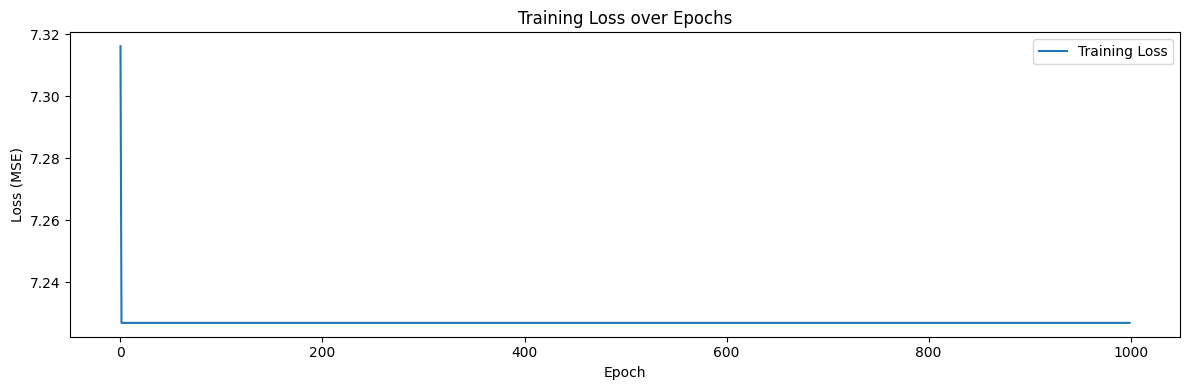

In [101]:
#Neural Network using AdaGrad, Sigmoid function and Step Decay:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_epoch):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    accumulated_gradients[i][0] + dweights ** 2,
                    accumulated_gradients[i][1] + dbiases ** 2
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Step decay: Reduce learning rate at specific epochs
            if (epoch + 1) % lr_decay_epoch == 0:
                learning_rate *= 0.5  # Adjust this factor as needed

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        # Print the sigmoid output and derivative for the first layer when training is 100% complete
        if (epoch + 1) == num_epochs:
            print("Sigmoid Output at Layer 1:", layer_outputs[1])
            print("Sigmoid Derivative at Layer 1:", self.activations[0](layer_outputs[1], derivative=True))

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 1
num_epochs = 1000
lr_decay_epoch = 100  # Adjust this value as needed
training_errors = model.train(x, y, learning_rate, num_epochs, lr_decay_epoch)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 9.763269, Learning Rate = 0.010000
2% progress: Training Loss = 9.698103, Learning Rate = 0.010000
3% progress: Training Loss = 9.694011, Learning Rate = 0.010000
4% progress: Training Loss = 9.693767, Learning Rate = 0.010000
5% progress: Training Loss = 9.693752, Learning Rate = 0.010000
6% progress: Training Loss = 9.693752, Learning Rate = 0.010000
7% progress: Training Loss = 9.693752, Learning Rate = 0.010000
8% progress: Training Loss = 9.693752, Learning Rate = 0.010000
9% progress: Training Loss = 9.693752, Learning Rate = 0.010000
10% progress: Training Loss = 9.693752, Learning Rate = 0.005000
11% progress: Training Loss = 9.693752, Learning Rate = 0.005000
12% progress: Training Loss = 9.693752, Learning Rate = 0.005000
13% progress: Training Loss = 9.693752, Learning Rate = 0.005000
14% progress: Training Loss = 9.693752, Learning Rate = 0.005000
15% progress: Training Loss = 9.693752, Learning Rate = 0.005000
16% progress: Training Loss = 9.69

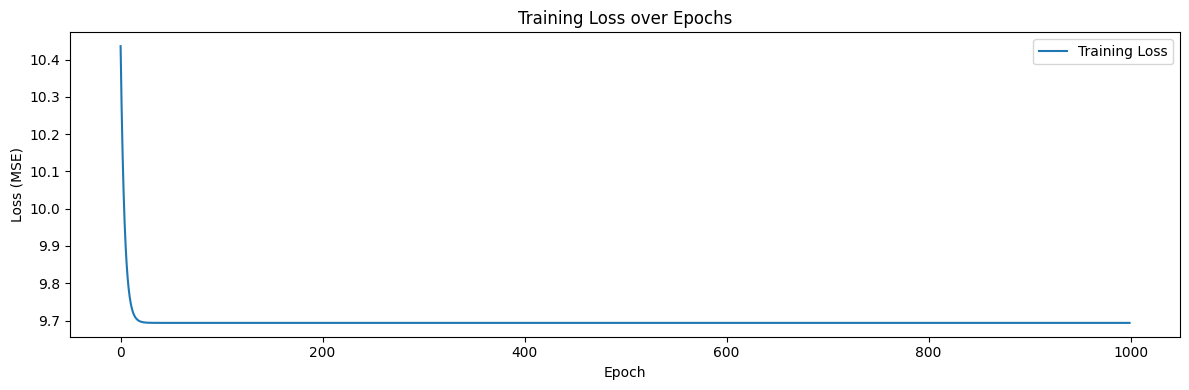

In [98]:
#Neural Network, sigmoid function, RMSProp and Step Decay: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_epoch):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    accumulated_gradients[i][0] + dweights ** 2,
                    accumulated_gradients[i][1] + dbiases ** 2
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Step decay: Reduce learning rate at specific epochs
            if (epoch + 1) % lr_decay_epoch == 0:
                learning_rate *= 0.5  # Adjust this factor as needed

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        # Print the sigmoid output and derivative for the first layer when training is 100% complete
        if (epoch + 1) == num_epochs:
            print("Sigmoid Output at Layer 1:", layer_outputs[1])
            print("Sigmoid Derivative at Layer 1:", self.activations[0](layer_outputs[1], derivative=True))

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 0.01
num_epochs = 1000
lr_decay_epoch = 100  # Adjust this value as needed
training_errors = model.train(x, y, learning_rate, num_epochs, lr_decay_epoch)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 11.314171, Learning Rate = 0.009044
2% progress: Training Loss = 9.375228, Learning Rate = 0.008179
3% progress: Training Loss = 9.108501, Learning Rate = 0.007397
4% progress: Training Loss = 9.077539, Learning Rate = 0.006690
5% progress: Training Loss = 9.073277, Learning Rate = 0.006050
6% progress: Training Loss = 9.072568, Learning Rate = 0.005472
7% progress: Training Loss = 9.072428, Learning Rate = 0.004948
8% progress: Training Loss = 9.072396, Learning Rate = 0.004475
9% progress: Training Loss = 9.072388, Learning Rate = 0.004047
10% progress: Training Loss = 9.072385, Learning Rate = 0.003660
11% progress: Training Loss = 9.072384, Learning Rate = 0.003310
12% progress: Training Loss = 9.072384, Learning Rate = 0.002994
13% progress: Training Loss = 9.072384, Learning Rate = 0.002708
14% progress: Training Loss = 9.072384, Learning Rate = 0.002449
15% progress: Training Loss = 9.072384, Learning Rate = 0.002215
16% progress: Training Loss = 9.0

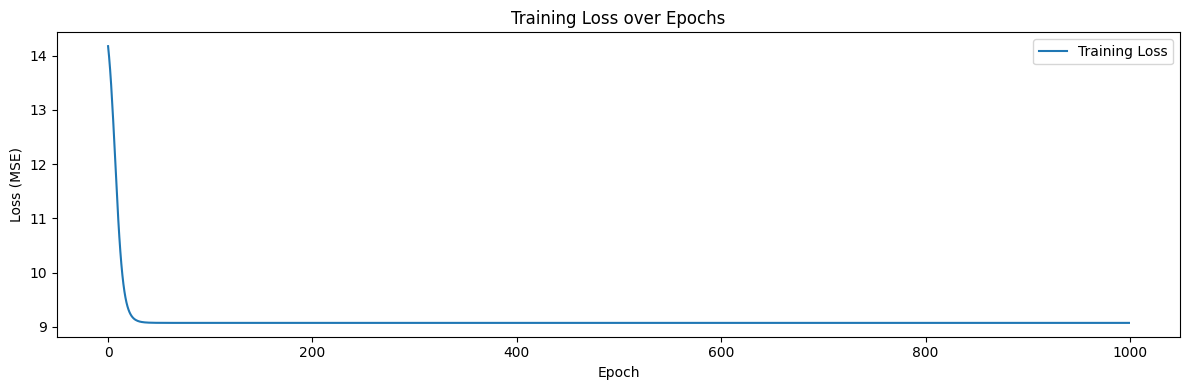

In [110]:
#Neural Network using AdaGrad, Sigmoid function and Exponential Decay:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_rate):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    accumulated_gradients[i][0] + dweights ** 2,
                    accumulated_gradients[i][1] + dbiases ** 2
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential decay: Reduce learning rate exponentially
            learning_rate *= lr_decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 0.01
num_epochs = 1000
lr_decay_rate = 0.99  # Adjust this value as needed (e.g., 0.99 for a 1% decay per epoch)
training_errors = model.train(x, y, learning_rate, num_epochs, lr_decay_rate)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 7.624044, Learning Rate = 0.009044
2% progress: Training Loss = 7.624041, Learning Rate = 0.008179
3% progress: Training Loss = 7.624041, Learning Rate = 0.007397
4% progress: Training Loss = 7.624041, Learning Rate = 0.006690
5% progress: Training Loss = 7.624041, Learning Rate = 0.006050
6% progress: Training Loss = 7.624041, Learning Rate = 0.005472
7% progress: Training Loss = 7.624041, Learning Rate = 0.004948
8% progress: Training Loss = 7.624041, Learning Rate = 0.004475
9% progress: Training Loss = 7.624041, Learning Rate = 0.004047
10% progress: Training Loss = 7.624041, Learning Rate = 0.003660
11% progress: Training Loss = 7.624041, Learning Rate = 0.003310
12% progress: Training Loss = 7.624041, Learning Rate = 0.002994
13% progress: Training Loss = 7.624041, Learning Rate = 0.002708
14% progress: Training Loss = 7.624041, Learning Rate = 0.002449
15% progress: Training Loss = 7.624041, Learning Rate = 0.002215
16% progress: Training Loss = 7.62

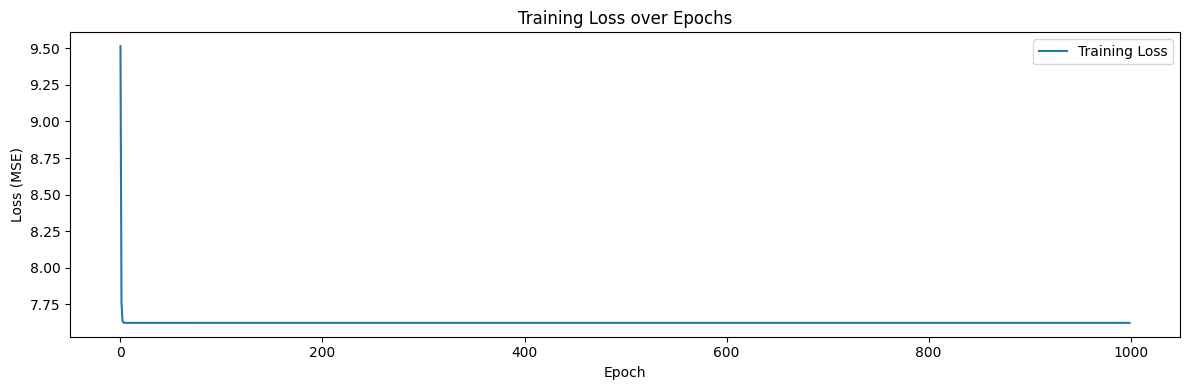

In [62]:
#Neural Network using RMSProp, sigmoid function and Exponential Decay:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_rate):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    lr_decay_rate * accumulated_gradients[i][0] + (1 - lr_decay_rate) * (dweights ** 2),
                    lr_decay_rate * accumulated_gradients[i][1] + (1 - lr_decay_rate) * (dbiases ** 2)
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential decay: Reduce learning rate exponentially
            learning_rate *= lr_decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [16, 16]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 0.01
num_epochs = 1000
lr_decay_rate = 0.99  # Adjust this value as needed (e.g., 0.99 for a 1% decay per epoch)
training_errors = model.train(x, y, learning_rate, num_epochs, lr_decay_rate)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 8.221651, Learning Rate = 0.010000
2% progress: Training Loss = 8.170261, Learning Rate = 0.010000
3% progress: Training Loss = 8.167369, Learning Rate = 0.010000
4% progress: Training Loss = 8.167209, Learning Rate = 0.010000
5% progress: Training Loss = 8.167200, Learning Rate = 0.010000
6% progress: Training Loss = 8.167199, Learning Rate = 0.010000
7% progress: Training Loss = 8.167199, Learning Rate = 0.010000
8% progress: Training Loss = 8.167199, Learning Rate = 0.010000
9% progress: Training Loss = 8.167199, Learning Rate = 0.010000
10% progress: Training Loss = 8.167199, Learning Rate = 0.010000
11% progress: Training Loss = 8.167199, Learning Rate = 0.100000
12% progress: Training Loss = 8.167199, Learning Rate = 0.100000
13% progress: Training Loss = 8.167199, Learning Rate = 0.100000
14% progress: Training Loss = 8.167199, Learning Rate = 0.100000
15% progress: Training Loss = 8.167199, Learning Rate = 0.100000
16% progress: Training Loss = 8.16

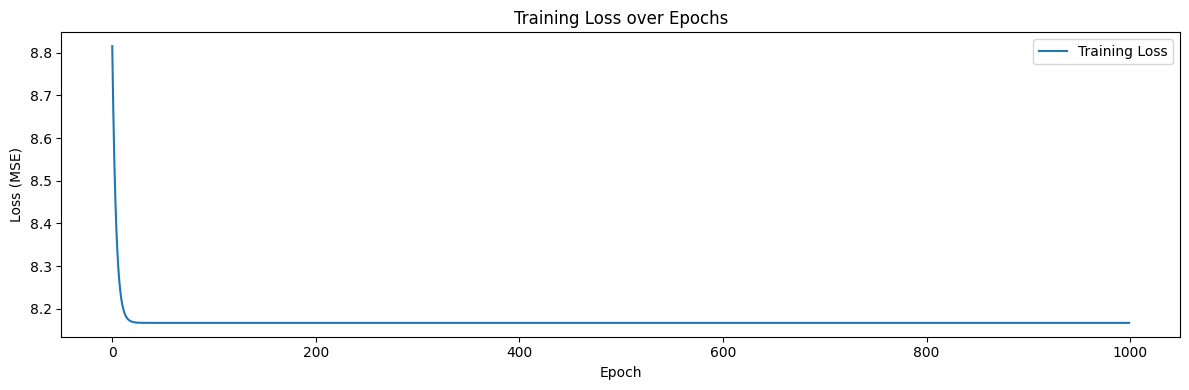

In [64]:
#Neural Network, sigmoid function, AdaGrad and cyclical learning rates: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate
        lr_cycle_step = (max_lr - min_lr) / (cycle_epochs // 2)
        cycle_count = 0

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    accumulated_gradients[i][0] + dweights ** 2,
                    accumulated_gradients[i][1] + dbiases ** 2
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Cycle learning rates
            if epoch % cycle_epochs == 0:
                if cycle_count % 2 == 0:
                    learning_rate = min_lr + lr_cycle_step * (cycle_count // 2)
                else:
                    learning_rate = max_lr - lr_cycle_step * (cycle_count // 2)
                cycle_count += 1

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000
cycle_epochs = 100
min_lr = 0.01
max_lr = 0.1
training_errors = model.train(x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 8.123448, Learning Rate = 0.010000
2% progress: Training Loss = 8.123439, Learning Rate = 0.010000
3% progress: Training Loss = 8.123439, Learning Rate = 0.010000
4% progress: Training Loss = 8.123439, Learning Rate = 0.010000
5% progress: Training Loss = 8.123439, Learning Rate = 0.010000
6% progress: Training Loss = 8.123439, Learning Rate = 0.010000
7% progress: Training Loss = 8.123439, Learning Rate = 0.010000
8% progress: Training Loss = 8.123439, Learning Rate = 0.010000
9% progress: Training Loss = 8.123439, Learning Rate = 0.010000
10% progress: Training Loss = 8.123439, Learning Rate = 0.010000
11% progress: Training Loss = 8.123439, Learning Rate = 0.100000
12% progress: Training Loss = 8.123439, Learning Rate = 0.100000
13% progress: Training Loss = 8.123439, Learning Rate = 0.100000
14% progress: Training Loss = 8.123439, Learning Rate = 0.100000
15% progress: Training Loss = 8.123439, Learning Rate = 0.100000
16% progress: Training Loss = 8.12

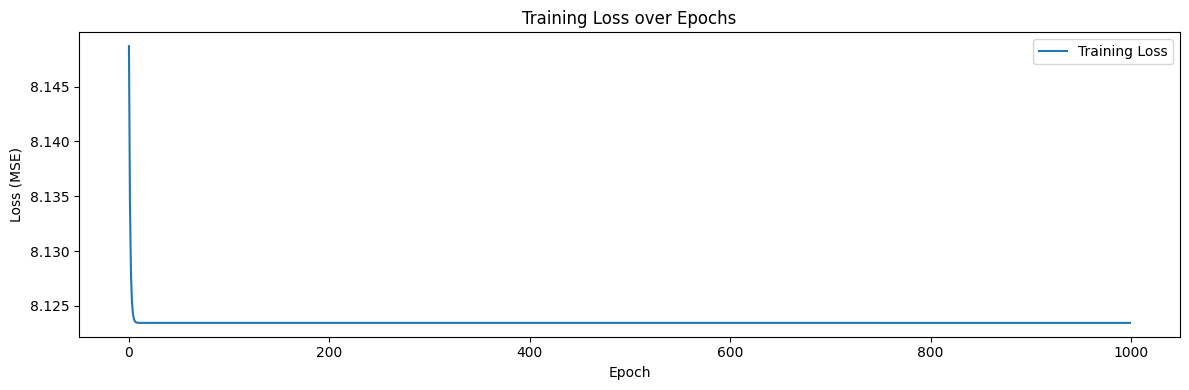

In [65]:
#Neural Network code using sigmoid function, RMSProp and Cyclical Learning Rates:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate
        lr_cycle_step = (max_lr - min_lr) / (cycle_epochs // 2)
        cycle_count = 0

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    0.9 * accumulated_gradients[i][0] + 0.1 * (dweights ** 2),
                    0.9 * accumulated_gradients[i][1] + 0.1 * (dbiases ** 2)
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Cycle learning rates
            if epoch % cycle_epochs == 0:
                if cycle_count % 2 == 0:
                    learning_rate = min_lr + lr_cycle_step * (cycle_count // 2)
                else:
                    learning_rate = max_lr - lr_cycle_step * (cycle_count // 2)
                cycle_count += 1

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000
cycle_epochs = 100
min_lr = 0.01
max_lr = 0.1
training_errors = model.train(x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 10.075706, Learning Rate = 0.001000
2% progress: Training Loss = 10.065874, Learning Rate = 0.001000
3% progress: Training Loss = 10.056659, Learning Rate = 0.001000
4% progress: Training Loss = 10.048005, Learning Rate = 0.001000
5% progress: Training Loss = 10.039864, Learning Rate = 0.001000
6% progress: Training Loss = 10.032192, Learning Rate = 0.001000
7% progress: Training Loss = 10.024951, Learning Rate = 0.001000
8% progress: Training Loss = 10.018105, Learning Rate = 0.001000
9% progress: Training Loss = 10.011623, Learning Rate = 0.001000
10% progress: Training Loss = 10.005477, Learning Rate = 0.001000
11% progress: Training Loss = 9.999642, Learning Rate = 0.001000
12% progress: Training Loss = 9.994096, Learning Rate = 0.001000
13% progress: Training Loss = 9.988817, Learning Rate = 0.001000
14% progress: Training Loss = 9.983787, Learning Rate = 0.001000
15% progress: Training Loss = 9.978989, Learning Rate = 0.001000
16% progress: Training L

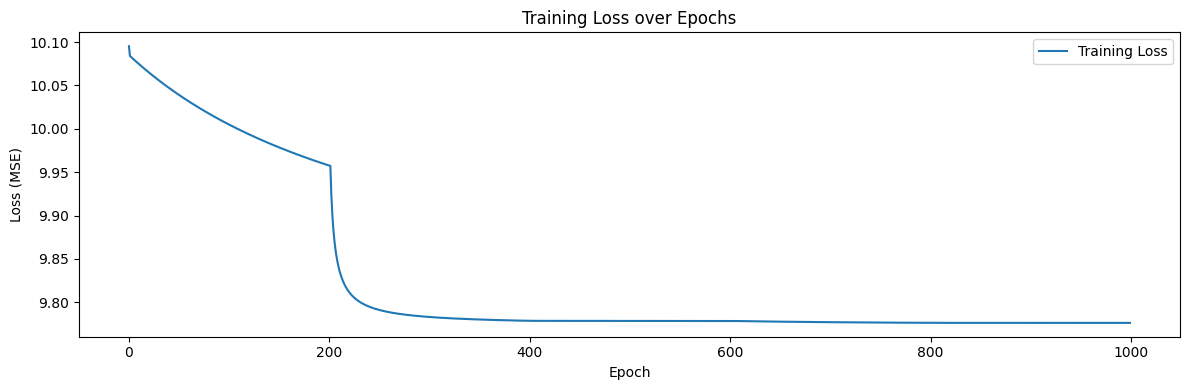

In [69]:
#Neural Network, using sigmoid function and cyclical learning rates only:
import numpy as np
import matplotlib.pyplot as plt

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate
        lr_cycle_step = (max_lr - min_lr) / (cycle_epochs // 2)
        cycle_count = 0

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                self.weights[i] -= learning_rate * dweights
                self.biases[i] -= learning_rate * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Cycle learning rates
            if epoch % cycle_epochs == 0:
                if cycle_count % 2 == 0:
                    learning_rate = min_lr + lr_cycle_step * (cycle_count // 2)
                else:
                    learning_rate = max_lr - lr_cycle_step * (cycle_count // 2)
                cycle_count += 1

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

input_dim = 1
hidden_layer_sizes = [16, 16, 16, 16]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000
cycle_epochs = 200
min_lr = 0.001
max_lr = 0.1

training_errors = model.train(x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 8.472494, Learning Rate = 0.009600
2% progress: Training Loss = 7.948765, Learning Rate = 0.009600
3% progress: Training Loss = 7.746821, Learning Rate = 0.009600
4% progress: Training Loss = 7.646013, Learning Rate = 0.009600
5% progress: Training Loss = 7.586746, Learning Rate = 0.009600
6% progress: Training Loss = 7.549095, Learning Rate = 0.009216
7% progress: Training Loss = 7.522630, Learning Rate = 0.009216
8% progress: Training Loss = 7.502916, Learning Rate = 0.009216
9% progress: Training Loss = 7.487687, Learning Rate = 0.009216
10% progress: Training Loss = 7.475581, Learning Rate = 0.009216
11% progress: Training Loss = 7.466022, Learning Rate = 0.008847
12% progress: Training Loss = 7.458117, Learning Rate = 0.008847
13% progress: Training Loss = 7.451421, Learning Rate = 0.008847
14% progress: Training Loss = 7.445679, Learning Rate = 0.008847
15% progress: Training Loss = 7.440702, Learning Rate = 0.008847
16% progress: Training Loss = 7.43

ValueError: x and y must have same first dimension, but have shapes (1000,) and (2000,)

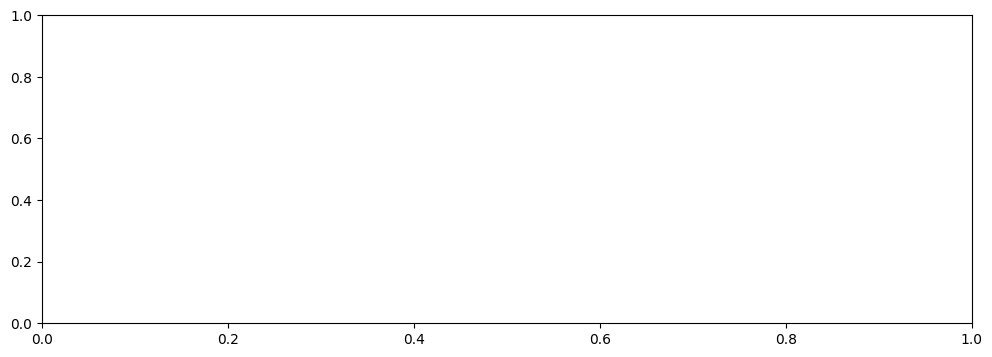

In [70]:
#Neural Network, using sigmoid function and exponential decay only: 
import numpy as np
import matplotlib.pyplot as plt

class FeedForwardNN:    
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input
        
    def train(self, x, y, initial_learning_rate, num_epochs):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        # Exponential decay parameters
        decay_rate = 0.96  # Adjust this decay rate as needed
        decay_steps = 50  # Adjust the number of steps as needed

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

                loss = np.mean((layer_output - y) ** 2)
                training_errors.append(loss)

                derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                self.weights[i] -= learning_rate * dweights
                self.biases[i] -= learning_rate * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential decay of learning rate
            if epoch % decay_steps == 0:
                learning_rate *= decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

input_dim = 1
hidden_layer_sizes = [32]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000

training_errors = model.train(x, y, initial_learning_rate, num_epochs)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 8.693003, Learning Rate = 0.010000
2% progress: Training Loss = 8.484363, Learning Rate = 0.010000
3% progress: Training Loss = 8.363961, Learning Rate = 0.010000
4% progress: Training Loss = 8.287378, Learning Rate = 0.010000
5% progress: Training Loss = 8.234978, Learning Rate = 0.005000
6% progress: Training Loss = 8.212818, Learning Rate = 0.005000
7% progress: Training Loss = 8.195609, Learning Rate = 0.005000
8% progress: Training Loss = 8.180638, Learning Rate = 0.005000
9% progress: Training Loss = 8.167504, Learning Rate = 0.005000
10% progress: Training Loss = 8.155895, Learning Rate = 0.002500
11% progress: Training Loss = 8.150076, Learning Rate = 0.002500
12% progress: Training Loss = 8.145092, Learning Rate = 0.002500
13% progress: Training Loss = 8.140375, Learning Rate = 0.002500
14% progress: Training Loss = 8.135905, Learning Rate = 0.002500
15% progress: Training Loss = 8.131662, Learning Rate = 0.001250
16% progress: Training Loss = 8.12

ValueError: x and y must have same first dimension, but have shapes (1000,) and (5000,)

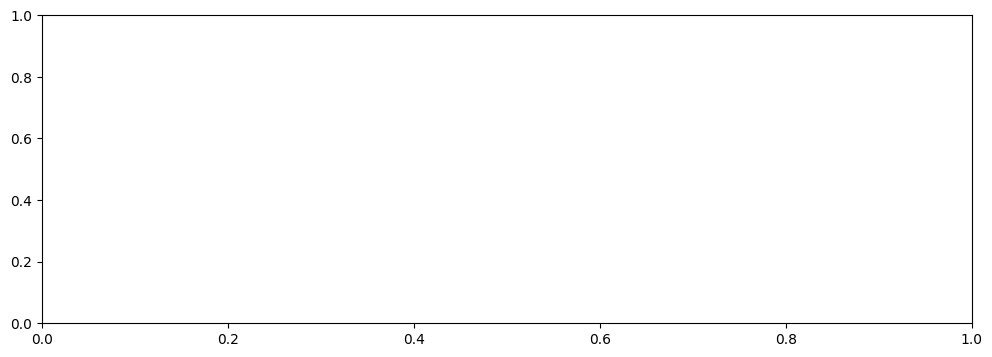

In [72]:
#Neural Network, using sigmoid function and Step Decay: 
import numpy as np
import matplotlib.pyplot as plt

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input
    
    def train(self, x, y, initial_learning_rate, num_epochs):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        # Step decay parameters
        step_size = 50  # Adjust this step size as needed

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

                loss = np.mean((layer_output - y) ** 2)
                training_errors.append(loss)

                derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                self.weights[i] -= learning_rate * dweights
                self.biases[i] -= learning_rate * dbiases
            
                derror = np.dot(doutput, self.weights[i].T)

            # Step decay of learning rate
            if (epoch + 1) % step_size == 0:
                learning_rate /= 2  # Adjust the factor as needed

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

input_dim = 1
hidden_layer_sizes = [8, 8, 8, 8]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000

training_errors = model.train(x, y, initial_learning_rate, num_epochs)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 9.851085, Learning Rate = 0.000100
2% progress: Training Loss = 9.844737, Learning Rate = 0.000100
3% progress: Training Loss = 9.838414, Learning Rate = 0.000100
4% progress: Training Loss = 9.832119, Learning Rate = 0.000100
5% progress: Training Loss = 9.825853, Learning Rate = 0.000100
6% progress: Training Loss = 9.819616, Learning Rate = 0.000100
7% progress: Training Loss = 9.813410, Learning Rate = 0.000100
8% progress: Training Loss = 9.807233, Learning Rate = 0.000100
9% progress: Training Loss = 9.801085, Learning Rate = 0.000100
10% progress: Training Loss = 9.794968, Learning Rate = 0.000100
11% progress: Training Loss = 9.788881, Learning Rate = 0.000100
12% progress: Training Loss = 9.782823, Learning Rate = 0.000100
13% progress: Training Loss = 9.776796, Learning Rate = 0.000100
14% progress: Training Loss = 9.770798, Learning Rate = 0.000100
15% progress: Training Loss = 9.764830, Learning Rate = 0.000100
16% progress: Training Loss = 9.75

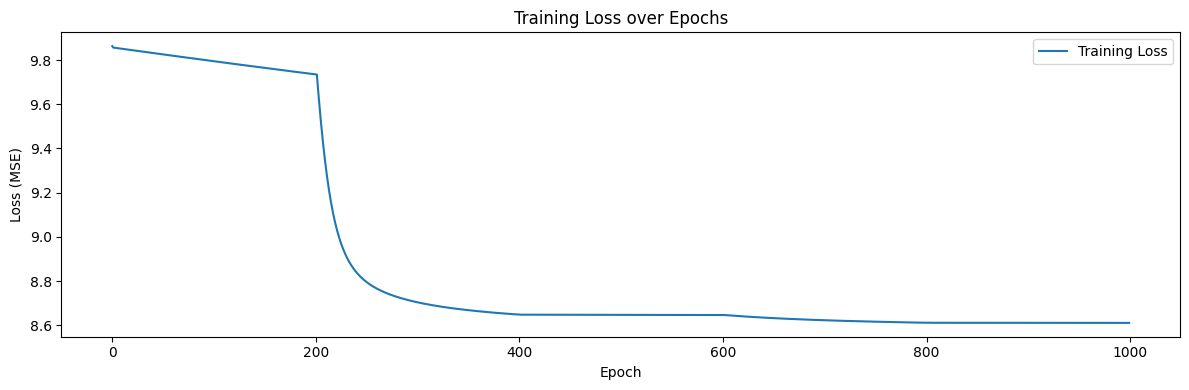

In [83]:
#Neural Network with sigmoid function, ADAM and Cyclical Learning Rates: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate
        lr_cycle_step = (max_lr - min_lr) / (cycle_epochs // 2)
        cycle_count = 0

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    beta1 * m[i][0] + (1 - beta1) * dweights,
                    beta1 * m[i][1] + (1 - beta1) * dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Cycle learning rates
            if epoch % cycle_epochs == 0:
                if cycle_count % 2 == 0:
                    learning_rate = min_lr + lr_cycle_step * (cycle_count // 2)
                else:
                    learning_rate = max_lr - lr_cycle_step * (cycle_count // 2)
                cycle_count += 1

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors
        
input_dim = 1
hidden_layer_sizes = [4, 4, 4, 4, 4, 4, 4, 4]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.001
num_epochs = 1000
cycle_epochs = 200
min_lr = 0.0001
max_lr = 0.01

training_errors = model.train(x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()
#NOTE: When using ADAM, in conjunction with a scheduler, a larger number of hidden layers are generating better results than a smaller number of hidden layers,
#whereas in the case of AdaGrad and RMSProp the opposite has been the case.

In [ ]:
#Neural Network with sigmoid function, ADAM and Exponential Decay: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, decay_rate, momentum):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    momentum * m[i][0] + dweights,
                    momentum * m[i][1] + dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential learning rate decay
            learning_rate *= decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors
        
input_dim = 1
hidden_layer_sizes = [32]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000
decay_rate = 0.95  # Exponential learning rate decay rate

training_errors = model.train(x, y, initial_learning_rate, num_epochs, decay_rate)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
#Sigmoid function Neural Network using AdaGrad and Exponential Decay with Cross-Validation and Bootstrapping: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

# Define your neural network hyperparameters
input_dim = 1
hidden_layer_sizes = (32,)
output_dim = 1
num_epochs = 1000
batch_size = 32
num_folds = 5  # Number of folds for cross-validation
num_bootstraps = 100  # Number of bootstrap samples

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, decay_rate):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    beta1 * m[i][0] + (1 - beta1) * dweights,
                    beta1 * m[i][1] + (1 - beta1) * dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential learning rate decay
            learning_rate *= decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Initialize arrays to store cross-validation and bootstrap results
cross_val_mses = []
cross_val_r2 = []  # Store R2 for cross-validation
bootstrap_mses = []
bootstrap_r2 = []  # Store R2 for bootstrap

# Cross-Validation
kf = KFold(n_splits=num_folds)

for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)  # Create your FFNN model
    # Train your model here

    val_predictions = model.predict(x_val)  # Replace with the appropriate method to get predictions
    val_mse = mean_squared_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    cross_val_mses.append(val_mse)
    cross_val_r2.append(val_r2)

# Bootstrapping
for _ in range(num_bootstraps):
    indices = np.random.choice(len(x), len(x), replace=True)
    x_bootstrap = x[indices]
    y_bootstrap = y[indices]

    model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)  # Create your FFNN model
    # Train your model here

    test_predictions = model.predict(x)  # Replace with the appropriate method to get predictions
    test_mse = mean_squared_error(y, test_predictions)
    test_r2 = r2_score(y, test_predictions)
    bootstrap_mses.append(test_mse)
    bootstrap_r2.append(test_r2)

# Compute and analyze statistics on cross-validation results
mean_cross_val_mse = np.mean(cross_val_mses)
std_cross_val_mse = np.std(cross_val_mses)
mean_cross_val_r2 = np.mean(cross_val_r2)
std_cross_val_r2 = np.std(cross_val_r2)

print(f"Cross-Validation Results:")
print(f"Mean MSE: {mean_cross_val_mse}")
print(f"Standard Deviation MSE: {std_cross_val_mse}")
print(f"Mean R2: {mean_cross_val_r2}")
print(f"Standard Deviation R2: {std_cross_val_r2}")

# Compute and analyze statistics on bootstrap results
mean_bootstrap_mse = np.mean(bootstrap_mses)
conf_interval_mse = np.percentile(bootstrap_mses, [2.5, 97.5])
mean_bootstrap_r2 = np.mean(bootstrap_r2)
conf_interval_r2 = np.percentile(bootstrap_r2, [2.5, 97.5])

print(f"Bootstrap Results:")
print(f"Mean MSE: {mean_bootstrap_mse}")
print(f"95% Confidence Interval for MSE: {conf_interval_mse[0]:.4f} - {conf_interval_mse[1]:.4f}")
print(f"Mean R2: {mean_bootstrap_r2}")
print(f"95% Confidence Interval for R2: {conf_interval_r2[0]:.4f} - {conf_interval_r2[1]:.4f}")

# Plot the training progress (you can choose to do this for one of the cross-validation or bootstrap runs)
plt.figure(figsize=(12, 4))
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.tight_layout()
plt.show()

AttributeError: 'FeedForwardNN' object has no attribute 'predict'

C:\Users\Kjæreng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kjæreng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kjæreng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kjæreng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network

Cross-Validation Results:
Mean MSE: 3.945555083114988
Standard Deviation MSE: 1.4979823175232645
Bootstrap Results:
Mean MSE: 3.9628696854298466
95% Confidence Interval: 3.2708 - 4.6996


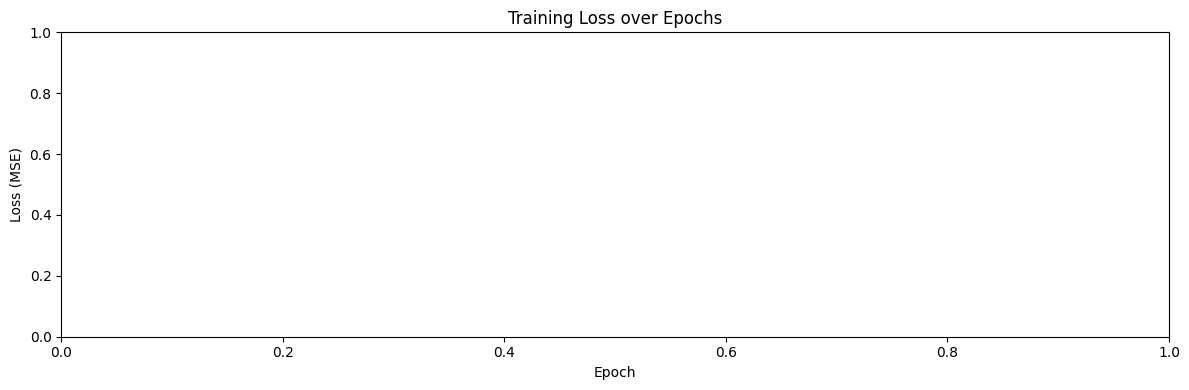

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_rate):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    lr_decay_rate * accumulated_gradients[i][0] + (1 - lr_decay_rate) * (dweights ** 2),
                    lr_decay_rate * accumulated_gradients[i][1] + (1 - lr_decay_rate) * (dbiases ** 2)
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential decay: Reduce learning rate exponentially
            learning_rate *= lr_decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 10) == 0:  # Print every 10% of the total epochs
    print(f"Epoch {epoch + 1}/{num_epochs}: MSE = {val_mse:.6f}")


        return training_errors

# Define your neural network hyperparameters
input_dim = 1
hidden_layer_sizes = (32,)
output_dim = 1
num_epochs = 1000
batch_size = 32
num_folds = 5  # Number of folds for cross-validation
num_bootstraps = 100  # Number of bootstrap samples

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Initialize arrays to store cross-validation and bootstrap results
cross_val_mses = []
bootstrap_mses = []

# Cross-Validation
kf = KFold(n_splits=num_folds)

for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=num_epochs)
    model.fit(x_train, y_train)
    val_predictions = model.predict(x_val)
    val_mse = np.mean((val_predictions - y_val) ** 2)
    cross_val_mses.append(val_mse)

# Bootstrapping
for _ in range(num_bootstraps):
    indices = np.random.choice(len(x), len(x), replace=True)
    x_bootstrap = x[indices]
    y_bootstrap = y[indices]

    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=num_epochs)
    model.fit(x_bootstrap, y_bootstrap)
    test_predictions = model.predict(x)
    test_mse = np.mean((test_predictions - y) ** 2)
    bootstrap_mses.append(test_mse)

# Compute and analyze statistics on cross-validation results
mean_cross_val_mse = np.mean(cross_val_mses)
std_cross_val_mse = np.std(cross_val_mses)

print(f"Cross-Validation Results:")
print(f"Mean MSE: {mean_cross_val_mse}")
print(f"Standard Deviation MSE: {std_cross_val_mse}")

# Compute and analyze statistics on bootstrap results
mean_bootstrap_mse = np.mean(bootstrap_mses)
conf_interval = np.percentile(bootstrap_mses, [2.5, 97.5])

print(f"Bootstrap Results:")
print(f"Mean MSE: {mean_bootstrap_mse}")
print(f"95% Confidence Interval: {conf_interval[0]:.4f} - {conf_interval[1]:.4f}")

# Plot the training progress (you can choose to do this for one of the cross-validation or bootstrap runs)
plt.figure(figsize=(12, 4))
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.tight_layout()
plt.show()

In [31]:
#Testing also the R2-score: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Define your neural network hyperparameters
input_dim = 1
hidden_layer_sizes = [32]
output_dim = 1
num_epochs = 1000
num_folds = 5  # Number of folds for cross-validation
num_bootstraps = 100  # Number of bootstrap samples
initial_learning_rate = 0.01
decay_rate = 0.99

def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_rate):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    lr_decay_rate * accumulated_gradients[i][0] + (1 - lr_decay_rate) * (dweights ** 2),
                    lr_decay_rate * accumulated_gradients[i][1] + (1 - lr_decay_rate) * (dbiases ** 2)
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential decay: Reduce learning rate exponentially
            learning_rate *= lr_decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Initialize arrays to store cross-validation and bootstrap results
cross_val_mses = []
cross_val_r2_scores = []
bootstrap_mses = []
bootstrap_r2_scores = []

def r2_score_custom(y_true, y_pred):
    y_mean = np.mean(y_true)
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_mean) ** 2)
    r2 = 1 - (ssr / sst)
    return r2

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Initialize arrays to store cross-validation and bootstrap results
cross_val_mses = []
cross_val_r2 = []
bootstrap_mses = []
bootstrap_r2 = []

# Cross-Validation
kf = KFold(n_splits=num_folds)

for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
    val_mses = []  # Store MSE for each epoch
    r2_scores = []

    for epoch in tqdm(range(num_epochs)):
        model.train(x_train, y_train, initial_learning_rate, max(1, num_epochs // 100), decay_rate)
        val_predictions = model.forward(x_val)
        val_mse = mean_squared_error(y_val, val_predictions)
        val_mses.append(val_mse)

        if (epoch + 1) % max(1, num_epochs // 100) == 0:
            percent_progress = ((epoch + 1) / num_epochs) * 100
            print(f"{int(percent_progress)}% progress: MSE = {val_mse:.6f}")

        initial_learning_rate *= decay_rate

    # Calculate R2 score for the entire validation set after training
    val_predictions = model.forward(x_val)
    val_r2 = r2_score_custom(y_val, val_predictions)
    cross_val_r2.append(val_r2)

    # Plot the training progress for MSE in this fold
    plt.figure(figsize=(12, 4))
    plt.plot(range(num_epochs), val_mses, label="MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("MSE over Epochs (Cross-Validation Fold)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
# Bootstrapping
for _ in range(num_bootstraps):
    indices = np.random.choice(len(x), len(x), replace=True)
    x_bootstrap = x[indices]
    y_bootstrap = y[indices]

    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=num_epochs)
    model.fit(x_bootstrap, y_bootstrap)
    
    test_predictions = model.predict(x)
    
    test_mse = np.mean((test_predictions - y) ** 2)
    test_r2 = r2_score(y, test_predictions)
    
    bootstrap_mses.append(test_mse)
    bootstrap_r2_scores.append(test_r2)

# Compute and analyze statistics on cross-validation results
mean_cross_val_mse = np.mean(cross_val_mses)
std_cross_val_mse = np.std(cross_val_mses)
mean_cross_val_r2 = np.mean(cross_val_r2_scores)
std_cross_val_r2 = np.std(cross_val_r2_scores)

print("Cross-Validation Results:")
print(f"Mean MSE: {mean_cross_val_mse}")
print(f"Standard Deviation MSE: {std_cross_val_mse}")
print(f"Mean R2 Score: {mean_cross_val_r2}")
print(f"Standard Deviation R2 Score: {std_cross_val_r2}")

# Compute and analyze statistics on bootstrap results
mean_bootstrap_mse = np.mean(bootstrap_mses)
conf_interval_mse = np.percentile(bootstrap_mses, [2.5, 97.5])
mean_bootstrap_r2 = np.mean(bootstrap_r2_scores)
conf_interval_r2 = np.percentile(bootstrap_r2_scores, [2.5, 97.5])

print("Bootstrap Results:")
print(f"Mean MSE: {mean_bootstrap_mse}")
print(f"95% Confidence Interval MSE: {conf_interval_mse[0]:.4f} - {conf_interval_mse[1]:.4f}")
print(f"Mean R2 Score: {mean_bootstrap_r2}")
print(f"95% Confidence Interval R2 Score: {conf_interval_r2[0]:.4f} - {conf_interval_r2[1]:.4f}")

# Plot the training progress (you can choose to do this for one of the cross-validation or bootstrap runs)
plt.figure(figsize=(12, 4))
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.tight_layout()
plt.show()

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


ZeroDivisionError: integer modulo by zero

In [29]:
#Neural Network sigmoid AdaGrad Exponential Decay Cross-Validated and Bootstrapped showing R2 as well: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Define your neural network hyperparameters
input_dim = 1
hidden_layer_sizes = [32]
output_dim = 1
num_epochs = 1000
num_folds = 5  # Number of folds for cross-validation
num_bootstraps = 100  # Number of bootstrap samples
initial_learning_rate = 0.01
decay_rate = 0.99

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_rate):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    lr_decay_rate * accumulated_gradients[i][0] + (1 - lr_decay_rate) * (dweights ** 2),
                    lr_decay_rate * accumulated_gradients[i][1] + (1 - lr_decay_rate) * (dbiases ** 2)
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential decay: Reduce learning rate exponentially
            learning_rate *= lr_decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors
        
def r2_score_custom(y_true, y_pred):
    y_mean = np.mean(y_true)
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_mean) ** 2)
    r2 = 1 - (ssr / sst)
    return r2

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Initialize arrays to store cross-validation and bootstrap results
cross_val_mses = []
cross_val_r2 = []
bootstrap_mses = []
bootstrap_r2 = []

# Cross-Validation
kf = KFold(n_splits=num_folds)

for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

    val_mses = []  # Store MSE for each epoch
    r2_scores = []

    for epoch in tqdm(range(num_epochs)):
        model.train(x_train, y_train, initial_learning_rate, max(1, num_epochs // 100), decay_rate)
        val_predictions = model.forward(x_val)
        val_mse = mean_squared_error(y_val, val_predictions)
        val_mses.append(val_mse)

    if (epoch + 1) % (num_epochs // 10) == 0:  # Print every 10% of the total epochs
        print(f"Epoch {epoch + 1}/{num_epochs}: MSE = {val_mse:.6f}")

        initial_learning_rate *= decay_rate

    # Calculate R2 score for the entire validation set after training
    val_predictions = model.forward(x_val)
    val_r2 = r2_score(y_val, val_predictions)
    cross_val_r2.append(val_r2)

    # Plot the training progress for MSE in this fold
    plt.figure(figsize=(12, 4))
    plt.plot(range(num_epochs), val_mses, label="MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("MSE over Epochs (Cross-Validation Fold)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Bootstrapping
for _ in range(num_bootstraps):
    indices = np.random.choice(len(x), len(x), replace=True)
    x_bootstrap = x[indices]
    y_bootstrap = y[indices]

    model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

    test_mses = []  # Store MSE for each epoch
    r2_scores = []

    for epoch in tqdm(range(num_epochs)):
        model.train(x_bootstrap, y_bootstrap, initial_learning_rate, max(1, num_epochs // 100), decay_rate)
        test_predictions = model.forward(x)
        test_mse = mean_squared_error(y, test_predictions)
        test_mses.append(test_mse)

    if (epoch + 1) % (num_epochs // 10) == 0:  # Print every 10% of the total epochs
        print(f"Epoch {epoch + 1}/{num_epochs}: MSE = {val_mse:.6f}")


        initial_learning_rate *= decay_rate

# Further analysis and statistics for both cross-validation and bootstrap
mean_cross_val_mse = np.mean(cross_val_mses)
std_cross_val_mse = np.std(cross_val_mses)
mean_cross_val_r2 = np.mean(cross_val_r2)
std_cross_val_r2 = np.std(cross_val_r2)

mean_bootstrap_mse = np.mean(bootstrap_mses)
conf_interval_mse = np.percentile(bootstrap_mses, [2.5, 97.5])
mean_bootstrap_r2 = np.mean(bootstrap_r2)
conf_interval_r2 = np.percentile(bootstrap_r2, [2.5, 97.5])

# Print or plot the results and statistics as needed
print("Cross-Validation Results:")
print(f"Mean MSE: {mean_cross_val_mse}")
print(f"Standard Deviation MSE: {std_cross_val_mse}")
print(f"Mean R2: {mean_cross_val_r2}")
print(f"Standard Deviation R2: {std_cross_val_r2}")

print("Bootstrap Results:")
print(f"Mean MSE: {mean_bootstrap_mse}")
print(f"95% Confidence Interval for MSE: {conf_interval_mse[0]:.4f} - {conf_interval_mse[1]:.4f}")
print(f"Mean R2: {mean_bootstrap_r2}")
print(f"95% Confidence Interval for R2: {conf_interval_r2[0]:.4f} - {conf_interval_r2[1]:.4f}")

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


ZeroDivisionError: integer modulo by zero

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar
from sklearn.metrics import r2_score  # Import r2_score

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, decay_rate):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    beta1 * m[i][0] + (1 - beta1) * dweights,
                    beta1 * m[i][1] + (1 - beta1) * dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential learning rate decay
            learning_rate *= decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

input_dim = 1
hidden_layer_sizes = [32]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000
decay_rate = 0.95  # Exponential learning rate decay rate

training_errors = model.train(x, y, initial_learning_rate, num_epochs, decay_rate)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Calculate and store R2 scores over epochs
r2_scores = []
for epoch in range(num_epochs):
    val_predictions = model.forward(x)
    r2 = r2_score(y, val_predictions)
    r2_scores.append(r2)

# Plot R2 scores over epochs
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), r2_scores, label="R2 Score")
plt.xlabel("Epoch")
plt.ylabel("R2 Score")
plt.title("R2 Score over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 15.042738, Learning Rate = 0.000100
2% progress: Training Loss = 15.042738, Learning Rate = 0.000100
3% progress: Training Loss = 15.042738, Learning Rate = 0.000100
4% progress: Training Loss = 15.042738, Learning Rate = 0.000100
5% progress: Training Loss = 15.042738, Learning Rate = 0.000100
6% progress: Training Loss = 15.042738, Learning Rate = 0.000100
7% progress: Training Loss = 15.042738, Learning Rate = 0.000100
8% progress: Training Loss = 15.042738, Learning Rate = 0.000100
9% progress: Training Loss = 15.042738, Learning Rate = 0.000100
10% progress: Training Loss = 15.042738, Learning Rate = 0.000100
11% progress: Training Loss = 15.042738, Learning Rate = 0.000100
12% progress: Training Loss = 15.042738, Learning Rate = 0.000100
13% progress: Training Loss = 15.042738, Learning Rate = 0.000100
14% progress: Training Loss = 15.042738, Learning Rate = 0.000100
15% progress: Training Loss = 15.042738, Learning Rate = 0.000100
16% progress: Train

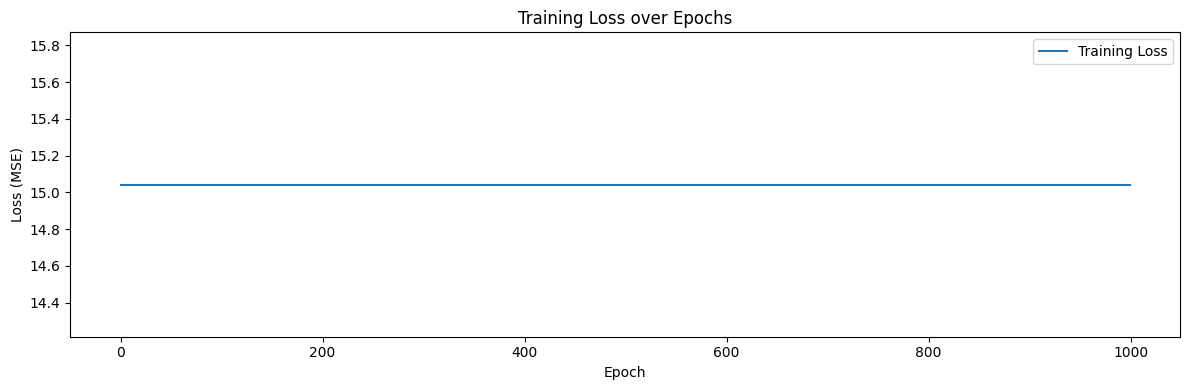

In [2]:
#Added momentum to selected runs: 
#Neural Network with sigmoid function, ADAM, Cyclical Learning Rates and Momentum: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.relu] * (len(hidden_layer_sizes) + 1)  # ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def relu(self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.maximum(0, x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr, momentum):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate
        lr_cycle_step = (max_lr - min_lr) / (cycle_epochs // 2)
        cycle_count = 0

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    beta1 * m[i][0] + (1 - beta1) * dweights,
                    beta1 * m[i][1] + (1 - beta1) * dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Cycle learning rates
            if epoch % cycle_epochs == 0:
                if cycle_count % 2 == 0:
                    learning_rate = min_lr + lr_cycle_step * (cycle_count // 2)
                else:
                    learning_rate = max_lr - lr_cycle_step * (cycle_count // 2)
                cycle_count += 1

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors
        
input_dim = 1
hidden_layer_sizes = [4, 4, 4, 4, 4, 4, 4, 4]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.001
num_epochs = 1000
cycle_epochs = 200
min_lr = 0.0001
max_lr = 0.01

momentum = 0.9
training_errors = model.train(x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr, momentum)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Neural Network with sigmoid function, ADAM, Momentum and Exponential Decay: 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.sigmoid] * (len(hidden_layer_sizes) + 1)  # Sigmoid for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, decay_rate, momentum):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.sigmoid(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    momentum * m[i][0] + dweights,
                    momentum * m[i][1] + dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential learning rate decay
            learning_rate *= decay_rate

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors
        
input_dim = 1
hidden_layer_sizes = [32]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000
decay_rate = 0.95  # Exponential learning rate decay rate

training_errors = model.train(x, y, initial_learning_rate, num_epochs, decay_rate, momentum=0.9)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 17.191183, Learning Rate = 1.000000
2% progress: Training Loss = 17.191183, Learning Rate = 1.000000
3% progress: Training Loss = 17.191183, Learning Rate = 1.000000
4% progress: Training Loss = 17.191183, Learning Rate = 1.000000
5% progress: Training Loss = 17.191183, Learning Rate = 1.000000
6% progress: Training Loss = 17.191183, Learning Rate = 1.000000
7% progress: Training Loss = 17.191183, Learning Rate = 1.000000
8% progress: Training Loss = 17.191183, Learning Rate = 1.000000
9% progress: Training Loss = 17.191183, Learning Rate = 1.000000
10% progress: Training Loss = 17.191183, Learning Rate = 0.500000
11% progress: Training Loss = 17.191183, Learning Rate = 0.500000
12% progress: Training Loss = 17.191183, Learning Rate = 0.500000
13% progress: Training Loss = 17.191183, Learning Rate = 0.500000
14% progress: Training Loss = 17.191183, Learning Rate = 0.500000
15% progress: Training Loss = 17.191183, Learning Rate = 0.500000
16% progress: Train

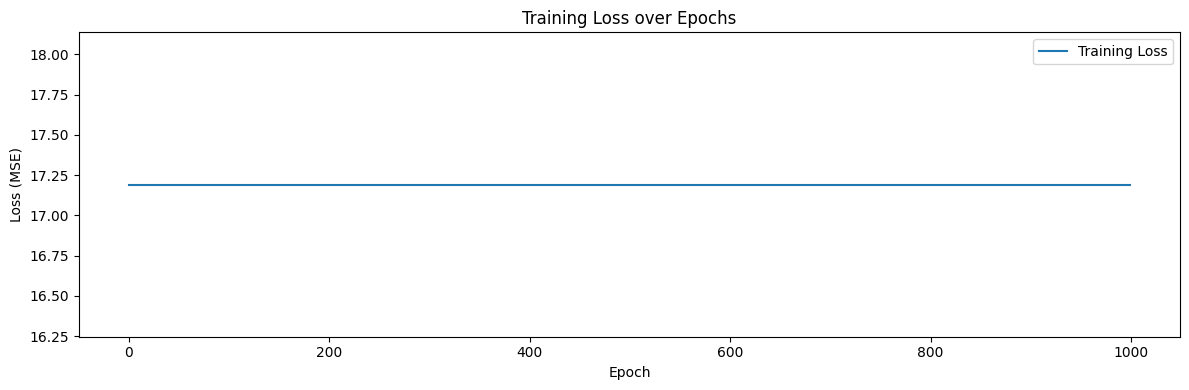

In [1]:
#Neural Network using AdaGrad, RELU and Step Decay:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.relu] * (len(hidden_layer_sizes) + 1)  # ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def relu(self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.maximum(0, x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_epoch):
        num_samples = len(x)
        training_errors = []
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    accumulated_gradients[i][0] + dweights ** 2,
                    accumulated_gradients[i][1] + dbiases ** 2
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            if (epoch + 1) % lr_decay_epoch == 0:
                learning_rate *= 0.5

            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        if (epoch + 1) == num_epochs:
            print("ReLU Output at Layer 1:", layer_outputs[1])
            print("ReLU Derivative at Layer 1:", self.activations[0](layer_outputs[1], derivative=True))

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 1
num_epochs = 1000
lr_decay_epoch = 100  # Adjust this value as needed
training_errors = model.train(x, y, learning_rate, num_epochs, lr_decay_epoch)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 14.510527, Learning Rate = 0.000100
2% progress: Training Loss = 14.510527, Learning Rate = 0.000100
3% progress: Training Loss = 14.510527, Learning Rate = 0.000100
4% progress: Training Loss = 14.510527, Learning Rate = 0.000100
5% progress: Training Loss = 14.510527, Learning Rate = 0.000100
6% progress: Training Loss = 14.510527, Learning Rate = 0.000100
7% progress: Training Loss = 14.510527, Learning Rate = 0.000100
8% progress: Training Loss = 14.510527, Learning Rate = 0.000100
9% progress: Training Loss = 14.510527, Learning Rate = 0.000100
10% progress: Training Loss = 14.510527, Learning Rate = 0.000100
11% progress: Training Loss = 14.510527, Learning Rate = 0.000100
12% progress: Training Loss = 14.510527, Learning Rate = 0.000100
13% progress: Training Loss = 14.510527, Learning Rate = 0.000100
14% progress: Training Loss = 14.510527, Learning Rate = 0.000100
15% progress: Training Loss = 14.510527, Learning Rate = 0.000100
16% progress: Train

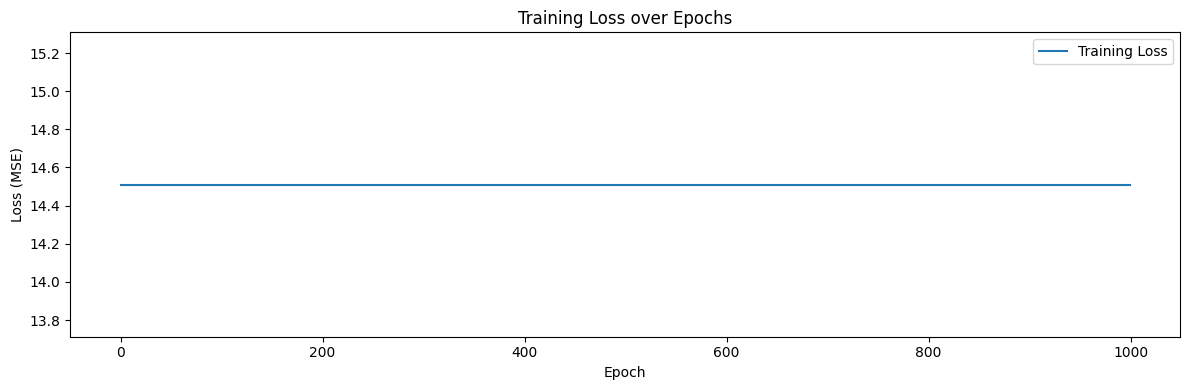

In [3]:
#Neural Network with RELU, ADAM, Cyclical Learning Rates and Momentum
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.relu] * (len(hidden_layer_sizes) + 1)  # ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def relu(self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.maximum(0, x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr, momentum):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate
        lr_cycle_step = (max_lr - min_lr) / (cycle_epochs // 2)
        cycle_count = 0

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    beta1 * m[i][0] + (1 - beta1) * dweights,
                    beta1 * m[i][1] + (1 - beta1) * dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Cycle learning rates
            if epoch % cycle_epochs == 0:
                if cycle_count % 2 == 0:
                    learning_rate = min_lr + lr_cycle_step * (cycle_count // 2)
                else:
                    learning_rate = max_lr - lr_cycle_step * (cycle_count // 2)
                cycle_count += 1

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors
        
input_dim = 1
hidden_layer_sizes = [4, 4, 4, 4, 4, 4, 4, 4]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.001
num_epochs = 1000
cycle_epochs = 200
min_lr = 0.0001
max_lr = 0.01

momentum = 0.9
training_errors = model.train(x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr, momentum)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

R2 Score: -3.5508522287580533


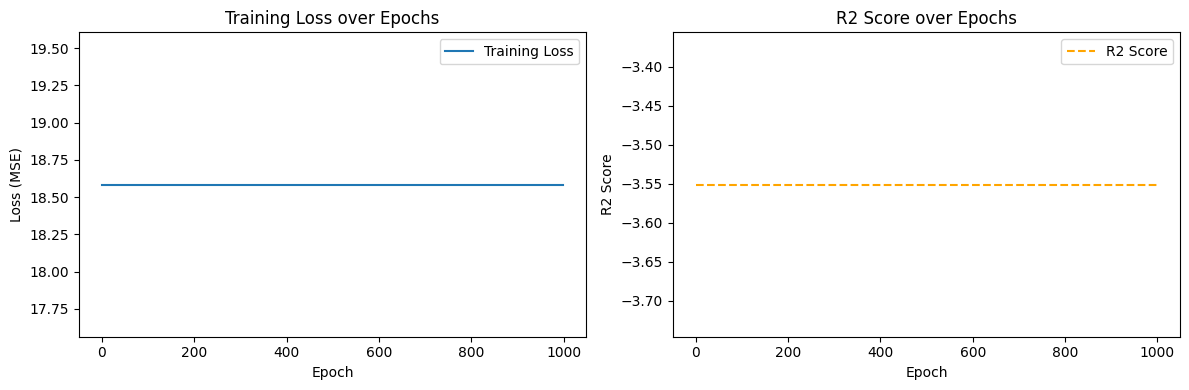

In [6]:
#Neural Network using RMSProp, RELU and Exponential Decay:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.relu] * (len(hidden_layer_sizes) + 1)  # ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def relu(self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.maximum(0, x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_rate):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    lr_decay_rate * accumulated_gradients[i][0] + (1 - lr_decay_rate) * (dweights ** 2),
                    lr_decay_rate * accumulated_gradients[i][1] + (1 - lr_decay_rate) * (dbiases ** 2)
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential decay: Reduce learning rate exponentially
            learning_rate *= lr_decay_rate

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [16, 16]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 0.01
num_epochs = 1000
lr_decay_rate = 0.99  # Adjust this value as needed (e.g., 0.99 for a 1% decay per epoch)
training_errors = model.train(x, y, learning_rate, num_epochs, lr_decay_rate)

test_data = np.random.rand(100, input_dim)  # Ensure the same number of samples
predictions = model.forward(test_data)

# Calculate R2 score
r2 = r2_score(y, predictions)
print("R2 Score:", r2)

# Plot the training progress and R2 score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), [r2] * num_epochs, label="R2 Score", linestyle='--', color='orange')
plt.xlabel("Epoch")
plt.ylabel("R2 Score")
plt.title("R2 Score over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

Predictions: [[1.74423617]
 [3.0975638 ]
 [3.25329293]
 [2.63097871]
 [5.12083979]
 [4.77109769]
 [2.86818102]
 [3.91803983]
 [2.29267948]
 [3.53028616]]


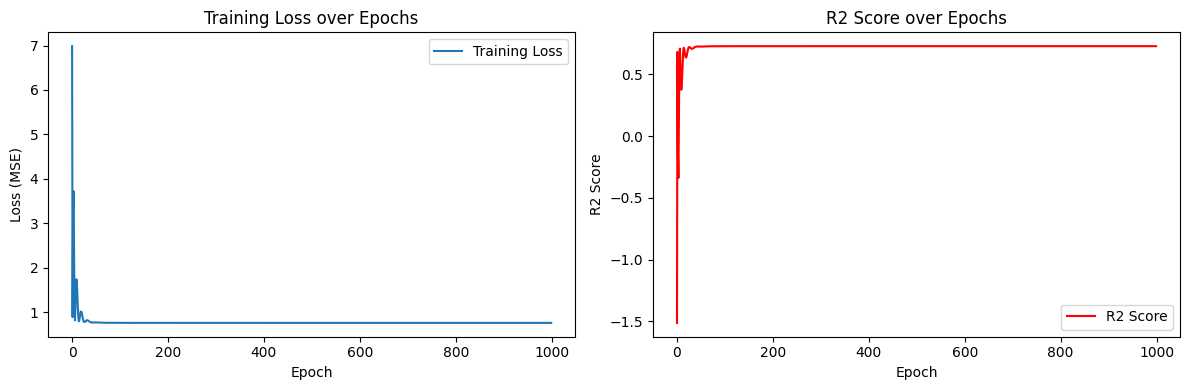

In [10]:
##Neural Network with RELU, ADAM, Momentum and Exponential Decay: 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.relu] * (len(hidden_layer_sizes) + 1)  # ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def relu(self, x, derivative=False):
        if derivative:
            return (x > 0).astype(np.float32)
        return np.maximum(0, x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, decay_rate, momentum):
        num_samples = len(x)
        training_errors = []  # Store training errors
        r2_scores = []  # Store R2 scores
        learning_rate = initial_learning_rate

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)
            
            # Calculate R2 score
            r2 = r2_score(y, layer_output)
            r2_scores.append(r2)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    momentum * m[i][0] + dweights,
                    momentum * m[i][1] + dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential learning rate decay
            learning_rate *= decay_rate

        return training_errors, r2_scores
          
input_dim = 1
hidden_layer_sizes = [32]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.01
num_epochs = 1000
decay_rate = 0.95  # Exponential learning rate decay rate

training_errors, r2_scores = model.train(x, y, initial_learning_rate, num_epochs, decay_rate, momentum=0.9)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress and R2 score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), r2_scores, label="R2 Score", color='red')
plt.xlabel("Epoch")
plt.ylabel("R2 Score")
plt.title("R2 Score over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Cross-Validation Results:
Mean R2: -0.9349584025190218
Standard Deviation R2: 2.2980210560638503
Bootstrap Results:
Mean R2: -1.9952039139497688
95% Confidence Interval for R2: -6.5353 - 0.9300


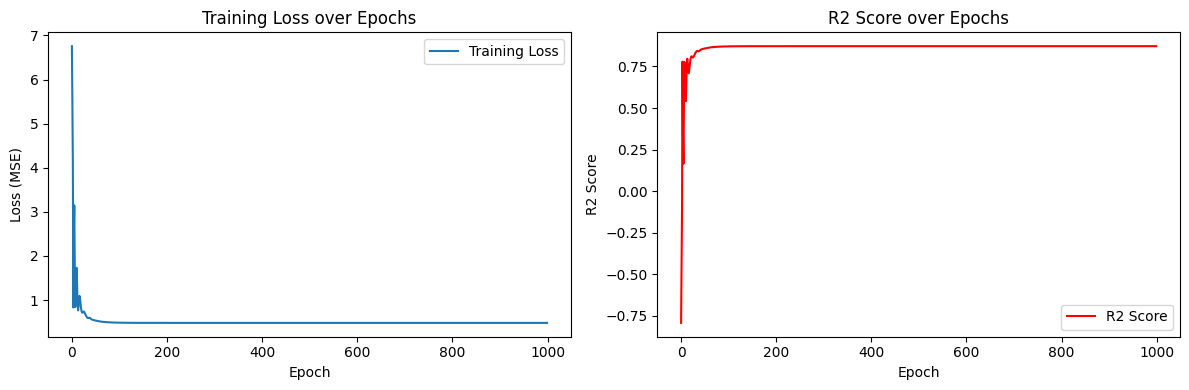

In [17]:
##Neural Network with LeakyRELU, ADAM, Momentum and Exponential Decay: 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, train_test_split

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.relu] * (len(hidden_layer_sizes) + 1)  # ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def relu(self, x, derivative=False):
        if derivative:
            return (x > 0).astype(np.float32)
        return np.maximum(0, x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

# Define a function to train and evaluate the model
def train_evaluate_model(model, x, y, num_epochs, initial_learning_rate, decay_rate, momentum):
    training_errors, r2_scores = [], []

    num_samples = len(x)
    training_errors = []  # Store training errors
    r2_scores = []  # Store R2 scores
    learning_rate = initial_learning_rate

    beta1 = 0.9  # ADAM parameter
    beta2 = 0.999  # ADAM parameter
    epsilon = 1e-8  # Small constant to prevent division by zero

    m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(model.weights, model.biases)]
    v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(model.weights, model.biases)]

    for epoch in range(num_epochs):
        layer_input = x
        layer_outputs = [layer_input]

        for i in range(len(model.weights)):
            weighted_sum = np.dot(layer_input, model.weights[i]) + model.biases[i]
            layer_output = model.activations[i](weighted_sum)
            layer_outputs.append(layer_output)
            layer_input = layer_output

        loss = np.mean((layer_output - y) ** 2)
        training_errors.append(loss)

        # Calculate R2 score
        r2 = r2_score(y, layer_output)
        r2_scores.append(r2)

        derror = 2 * (layer_output - y) / num_samples

        for i in range(len(model.weights) - 1, -1, -1):
            dactivation = model.relu(layer_outputs[i + 1], derivative=True)
            doutput = derror * dactivation
            dweights = np.dot(layer_outputs[i].T, doutput)
            dbiases = np.sum(doutput, axis=0)

            m[i] = (
                momentum * m[i][0] + dweights,
                momentum * m[i][1] + dbiases
            )
            v[i] = (
                beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
            )

            m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
            m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
            v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
            v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

            model.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
            model.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

            derror = np.dot(doutput, model.weights[i].T)

        # Exponential learning rate decay
        learning_rate *= decay_rate

    return training_errors, r2_scores

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [16, 16]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)
        
# Initialize arrays to store cross-validation and bootstrap results
cross_val_mses = []
cross_val_r2 = []  # Store R2 for cross-validation
bootstrap_mses = []
bootstrap_r2 = []  # Store R2 for bootstrap

# Cross-Validation
num_folds = 5
kf = KFold(n_splits=num_folds)

for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
    training_errors, r2_scores = train_evaluate_model(model, x_train, y_train, num_epochs, initial_learning_rate, decay_rate, momentum=0.9)

    val_predictions = model.forward(x_val)
    val_r2 = r2_score(y_val, val_predictions)
    cross_val_r2.append(val_r2)

# Bootstrapping
num_bootstraps = 100

for _ in range(num_bootstraps):
    indices = np.random.choice(len(x), len(x), replace=True)
    x_bootstrap = x[indices]
    y_bootstrap = y[indices]

    x_train_bootstrap, x_val_bootstrap, y_train_bootstrap, y_val_bootstrap = train_test_split(x_bootstrap, y_bootstrap, test_size=0.2)
    model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
    training_errors, r2_scores = train_evaluate_model(model, x_train_bootstrap, y_train_bootstrap, num_epochs, initial_learning_rate, decay_rate, momentum=0.9)

    test_predictions = model.forward(x_val_bootstrap)
    test_r2 = r2_score(y_val_bootstrap, test_predictions)
    bootstrap_r2.append(test_r2)

# Compute and analyze statistics on cross-validation results
mean_cross_val_r2 = np.mean(cross_val_r2)
std_cross_val_r2 = np.std(cross_val_r2)
print(f"Cross-Validation Results:")
print(f"Mean R2: {mean_cross_val_r2}")
print(f"Standard Deviation R2: {std_cross_val_r2}")

# Compute and analyze statistics on bootstrap results
mean_bootstrap_r2 = np.mean(bootstrap_r2)
conf_interval_r2 = np.percentile(bootstrap_r2, [2.5, 97.5])
print(f"Bootstrap Results:")
print(f"Mean R2: {mean_bootstrap_r2}")
print(f"95% Confidence Interval for R2: {conf_interval_r2[0]:.4f} - {conf_interval_r2[1]:.4f}")

# Plot the training progress and R2 score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), r2_scores, label="R2 Score", color='red')
plt.xlabel("Epoch")
plt.ylabel("R2 Score")
plt.title("R2 Score over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

1% progress: Training Loss = 2643.484683, Learning Rate = 1.000000
2% progress: Training Loss = 6303.320346, Learning Rate = 1.000000
3% progress: Training Loss = 11529.132034, Learning Rate = 1.000000
4% progress: Training Loss = 18320.921219, Learning Rate = 1.000000
5% progress: Training Loss = 26678.689248, Learning Rate = 1.000000
6% progress: Training Loss = 36602.437347, Learning Rate = 1.000000
7% progress: Training Loss = 48092.166631, Learning Rate = 1.000000
8% progress: Training Loss = 61147.878113, Learning Rate = 1.000000
9% progress: Training Loss = 75769.572716, Learning Rate = 1.000000
10% progress: Training Loss = 91957.251283, Learning Rate = 0.500000
11% progress: Training Loss = 3789.487952, Learning Rate = 0.500000
12% progress: Training Loss = 4493.396264, Learning Rate = 0.500000
13% progress: Training Loss = 5257.245188, Learning Rate = 0.500000
14% progress: Training Loss = 6081.034729, Learning Rate = 0.500000
15% progress: Training Loss = 6964.764895, Learni

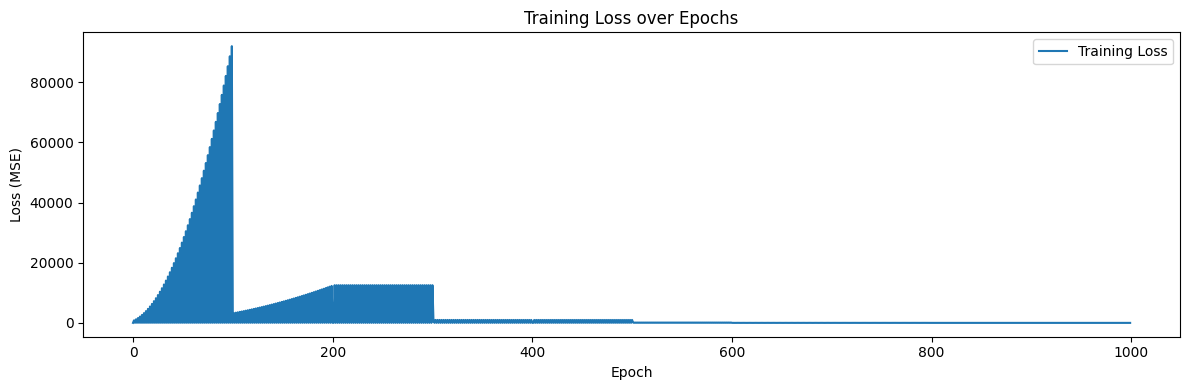

In [18]:
#Neural Network using RMSProp, LeakyRELU and Exponential Decay:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.leaky_relu] * (len(hidden_layer_sizes) + 1)  # Leaky ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def leaky_relu(self, x, derivative=False):
        alpha = 0.01  # Adjust the alpha value as needed
        if derivative:
            return np.where(x > 0, 1.0, alpha)
        return np.maximum(alpha * x, x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_epoch):
        num_samples = len(x)
        training_errors = []
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.leaky_relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    accumulated_gradients[i][0] + dweights ** 2,
                    accumulated_gradients[i][1] + dbiases ** 2
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            if (epoch + 1) % lr_decay_epoch == 0:
                learning_rate *= 0.5

            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        if (epoch + 1) == num_epochs:
            print("Leaky ReLU Output at Layer 1:", layer_outputs[1])
            print("Leaky ReLU Derivative at Layer 1:", self.activations[0](layer_outputs[1], derivative=True))

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 1
num_epochs = 1000
lr_decay_epoch = 100  # Adjust this value as needed
training_errors = model.train(x, y, learning_rate, num_epochs, lr_decay_epoch)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 13.923669, Learning Rate = 0.000100
2% progress: Training Loss = 13.827320, Learning Rate = 0.000100
3% progress: Training Loss = 13.729247, Learning Rate = 0.000100
4% progress: Training Loss = 13.629297, Learning Rate = 0.000100
5% progress: Training Loss = 13.527355, Learning Rate = 0.000100
6% progress: Training Loss = 13.423354, Learning Rate = 0.000100
7% progress: Training Loss = 13.317235, Learning Rate = 0.000100
8% progress: Training Loss = 13.208896, Learning Rate = 0.000100
9% progress: Training Loss = 13.098337, Learning Rate = 0.000100
10% progress: Training Loss = 12.985543, Learning Rate = 0.000100
11% progress: Training Loss = 12.870435, Learning Rate = 0.000100
12% progress: Training Loss = 12.752984, Learning Rate = 0.000100
13% progress: Training Loss = 12.633196, Learning Rate = 0.000100
14% progress: Training Loss = 12.511030, Learning Rate = 0.000100
15% progress: Training Loss = 12.386469, Learning Rate = 0.000100
16% progress: Train

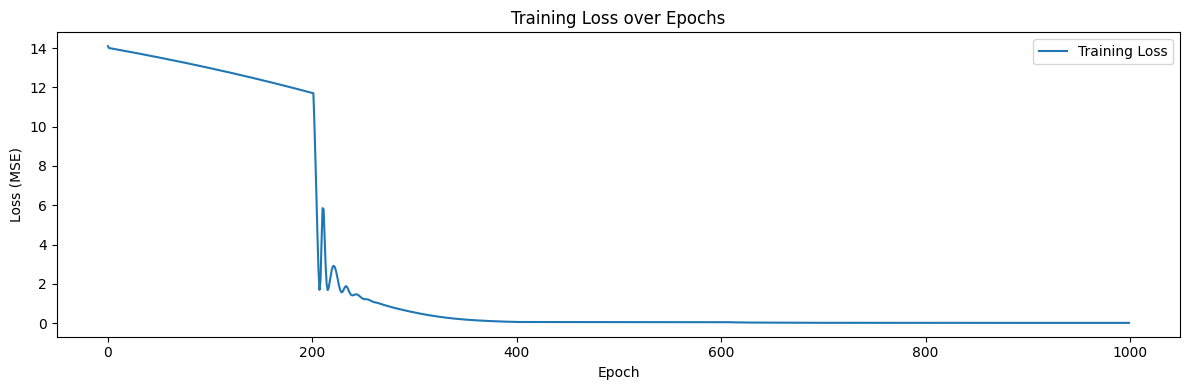

In [3]:
#Neural Network with LeakyRELU, ADAM, Cyclical Learning Rates and Momentum, using Glorot-initialization of the weights and biases
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.leaky_relu] * (len(hidden_layer_sizes) + 1)  # Leaky ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            # Glorot initialization for weights
            limit = np.sqrt(6.0 / (prev_layer_size + layer_size))
            weight_layer = np.random.uniform(-limit, limit, size=(prev_layer_size, layer_size))
            # Initialize biases to zeros
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        limit = np.sqrt(6.0 / (prev_layer_size + output_dim))
        weight_output = np.random.uniform(-limit, limit, size=(prev_layer_size, output_dim))
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)
        
    def leaky_relu(self, x, derivative=False):
        alpha = 0.01  # Adjust the alpha value as needed
        if derivative:
            return np.where(x > 0, 1, alpha)
        return np.where(x > 0, x, alpha * x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr, momentum):
        num_samples = len(x)
        training_errors = []  # Store training errors
        learning_rate = initial_learning_rate
        lr_cycle_step = (max_lr - min_lr) / (cycle_epochs // 2)
        cycle_count = 0

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.leaky_relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    beta1 * m[i][0] + (1 - beta1) * dweights,
                    beta1 * m[i][1] + (1 - beta1) * dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Cycle learning rates
            if epoch % cycle_epochs == 0:
                if cycle_count % 2 == 0:
                    learning_rate = min_lr + lr_cycle_step * (cycle_count // 2)
                else:
                    learning_rate = max_lr - lr_cycle_step * (cycle_count // 2)
                cycle_count += 1

            # Print training loss at each percentage of progress
            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        return training_errors

# The rest of the code remains the same
input_dim = 1
hidden_layer_sizes = [4, 4, 4, 4, 4, 4, 4, 4]  # You can adjust the number and size of hidden layers
output_dim = 1
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
initial_learning_rate = 0.001
num_epochs = 1000
cycle_epochs = 200
min_lr = 0.0001
max_lr = 0.01

momentum = 0.9
training_errors = model.train(x, y, initial_learning_rate, num_epochs, cycle_epochs, min_lr, max_lr, momentum)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

1% progress: Training Loss = 8931.026376, Learning Rate = 1.000000
2% progress: Training Loss = 28089.857490, Learning Rate = 1.000000
3% progress: Training Loss = 57936.842045, Learning Rate = 1.000000
4% progress: Training Loss = 98471.983647, Learning Rate = 1.000000
5% progress: Training Loss = 149695.285275, Learning Rate = 1.000000
6% progress: Training Loss = 211606.749499, Learning Rate = 1.000000
7% progress: Training Loss = 284206.378305, Learning Rate = 1.000000
8% progress: Training Loss = 367494.173379, Learning Rate = 1.000000
9% progress: Training Loss = 461470.136179, Learning Rate = 1.000000
10% progress: Training Loss = 566134.267954, Learning Rate = 0.500000
11% progress: Training Loss = 20238.224532, Learning Rate = 0.500000
12% progress: Training Loss = 23644.921614, Learning Rate = 0.500000
13% progress: Training Loss = 27316.497270, Learning Rate = 0.500000
14% progress: Training Loss = 31252.951511, Learning Rate = 0.500000
15% progress: Training Loss = 35454.28

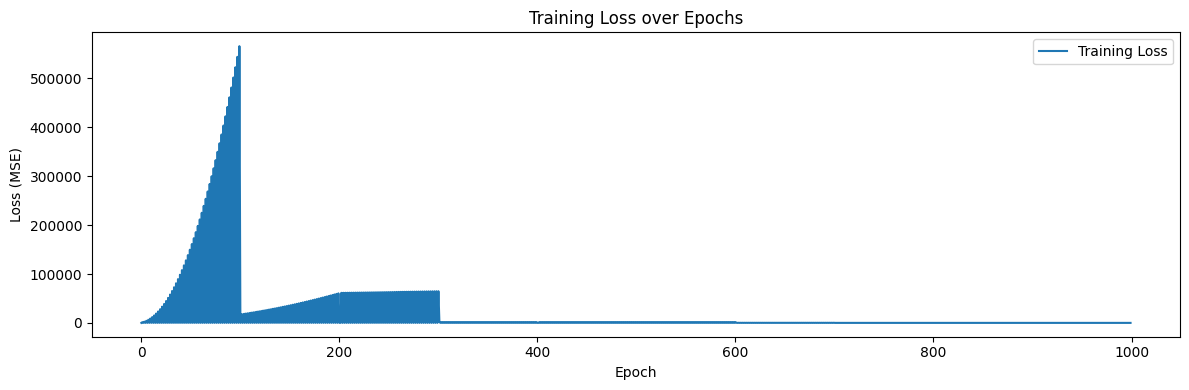

In [20]:
#Neutral Networks using AdaGrad, LeakyRELU and Step Decay:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.leaky_relu] * (len(hidden_layer_sizes) + 1)  # Leaky ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def leaky_relu(self, x, derivative=False):
        alpha = 0.01  # Adjust the alpha value as needed
        if derivative:
            return np.where(x > 0, 1, alpha)
        return np.where(x > 0, x, alpha * x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, lr_decay_epoch):
        num_samples = len(x)
        training_errors = []
        learning_rate = initial_learning_rate

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            accumulated_gradients = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.leaky_relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                accumulated_gradients[i] = (
                    accumulated_gradients[i][0] + dweights ** 2,
                    accumulated_gradients[i][1] + dbiases ** 2
                )

                self.weights[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][0]) + 1e-8)) * dweights
                self.biases[i] -= (learning_rate / (np.sqrt(accumulated_gradients[i][1]) + 1e-8)) * dbiases

                derror = np.dot(doutput, self.weights[i].T)

            if (epoch + 1) % lr_decay_epoch == 0:
                learning_rate *= 0.5

            if (epoch + 1) % (num_epochs // 100) == 0:
                percent_progress = ((epoch + 1) / num_epochs) * 100
                print(f"{int(percent_progress)}% progress: Training Loss = {loss:.6f}, Learning Rate = {learning_rate:.6f}")

        if (epoch + 1) == num_epochs:
            print("Leaky ReLU Output at Layer 1:", layer_outputs[1])
            print("Leaky ReLU Derivative at Layer 1:", self.activations[0](layer_outputs[1], derivative=True))

        return training_errors

input_dim = 1  # Replace with the appropriate input dimension
hidden_layer_sizes = [32]  # Replace with the sizes of hidden layers as needed
output_dim = 1  # Replace with the appropriate output dimension
model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x**4 * x + x**3 + x**2 + 0.1 * np.random.randn(100, output_dim)

# Train the model
learning_rate = 1
num_epochs = 1000
lr_decay_epoch = 100  # Adjust this value as needed
training_errors = model.train(x, y, learning_rate, num_epochs, lr_decay_epoch)

# Evaluate the model
test_data = np.random.rand(10, input_dim)
predictions = model.forward(test_data)
print("Predictions:", predictions)

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.plot(range(num_epochs), training_errors, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

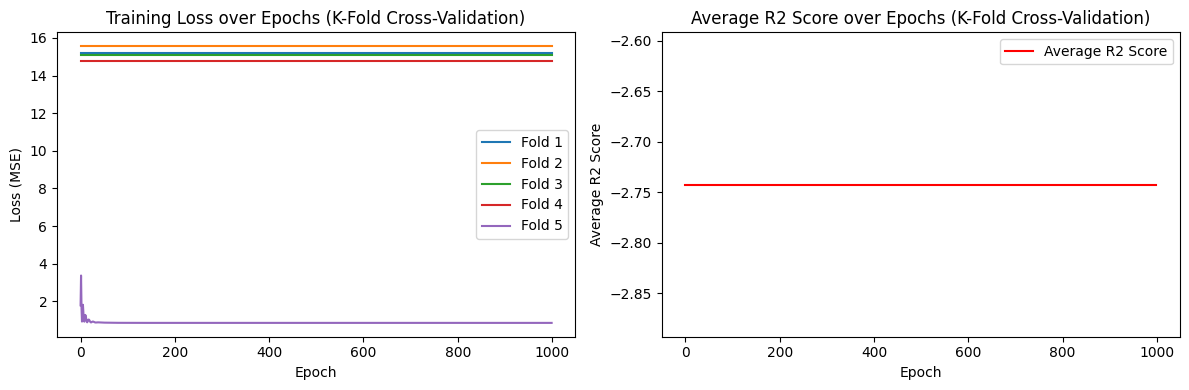

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.relu] * (len(hidden_layer_sizes) + 1)  # ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def relu(self, x, derivative=False):
        if derivative:
            return (x > 0).astype(np.float32)
        return np.maximum(0, x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, decay_rate, momentum):
        num_samples = len(x)
        training_errors = []  # Store training errors
        r2_scores = []  # Store R2 scores
        learning_rate = initial_learning_rate

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)
            
            # Calculate R2 score
            r2 = r2_score(y, layer_output)
            r2_scores.append(r2)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    momentum * m[i][0] + dweights,
                    momentum * m[i][1] + dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential learning rate decay
            learning_rate *= decay_rate

        return training_errors, r2_scores

def k_fold_cross_validation(x, y, k, input_dim, hidden_layer_sizes, output_dim, initial_learning_rate, num_epochs, decay_rate, momentum):
    num_samples = len(x)
    fold_size = num_samples // k
    training_errors = []
    r2_scores = []
    
    for fold in range(k):
        start_idx = fold * fold_size
        end_idx = (fold + 1) * fold_size
        
        x_train = np.concatenate((x[:start_idx], x[end_idx:]), axis=0)
        y_train = np.concatenate((y[:start_idx], y[end_idx:]), axis=0)
        
        x_val = x[start_idx:end_idx]
        y_val = y[start_idx:end_idx]
        
        model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
        train_errors, r2 = model.train(x_train, y_train, initial_learning_rate, num_epochs, decay_rate, momentum)
        
        training_errors.append(train_errors)
        r2_scores.append(r2_score(y_val, model.forward(x_val)))
    
    return training_errors, r2_scores

# Set up the input and hidden layer sizes, etc.
input_dim = 1
hidden_layer_sizes = [32]
output_dim = 1

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# K-fold cross-validation
k = 5
initial_learning_rate = 0.01
num_epochs = 1000
decay_rate = 0.95
momentum = 0.9

training_errors, r2_scores = k_fold_cross_validation(x, y, k, input_dim, hidden_layer_sizes, output_dim, initial_learning_rate, num_epochs, decay_rate, momentum)

# Calculate average training errors and average R2 scores over epochs
avg_training_errors = np.mean(training_errors, axis=0)
avg_r2_scores = np.mean(r2_scores)  # Calculate the average R2 score

# Plot the training progress and average R2 score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for i in range(k):
    plt.plot(range(num_epochs), training_errors[i], label=f"Fold {i + 1}")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs (K-Fold Cross-Validation)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), [avg_r2_scores] * num_epochs, label="Average R2 Score", color='red')
plt.xlabel("Epoch")
plt.ylabel("Average R2 Score")
plt.title("Average R2 Score over Epochs (K-Fold Cross-Validation)")
plt.legend()

plt.tight_layout()
plt.show()

1% progress: Training Loss = 1.441047, Learning Rate = 0.100000
2% progress: Training Loss = 1.984005, Learning Rate = 0.100000
3% progress: Training Loss = 3.123413, Learning Rate = 0.100000
4% progress: Training Loss = 4.578967, Learning Rate = 0.100000
5% progress: Training Loss = 6.350667, Learning Rate = 0.100000
6% progress: Training Loss = 8.438511, Learning Rate = 0.100000
7% progress: Training Loss = 10.842502, Learning Rate = 0.100000
8% progress: Training Loss = 13.562637, Learning Rate = 0.100000
9% progress: Training Loss = 16.598919, Learning Rate = 0.100000
10% progress: Training Loss = 19.951346, Learning Rate = 0.050000
11% progress: Training Loss = 2.619278, Learning Rate = 0.050000
12% progress: Training Loss = 2.876144, Learning Rate = 0.050000
13% progress: Training Loss = 3.147324, Learning Rate = 0.050000
14% progress: Training Loss = 3.432818, Learning Rate = 0.050000
15% progress: Training Loss = 3.732627, Learning Rate = 0.050000
16% progress: Training Loss = 

C:\Users\Kjæreng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: (array([2.55069355, 3.7346816 , 1.96684723, 6.38312716, 2.57781438,
       5.78375685, 2.10448237, 4.00021376, 2.15016173, 1.95442702,
       4.76444853, 2.18191759, 2.11155315, 3.96593403, 6.93837654,
       6.73319601, 1.9164696 , 2.60812221, 6.54473344, 1.97342085,
       3.65888368, 5.06674977, 4.30507089, 2.03483741, 2.6445714 ,
       3.4084216 , 2.11111446, 2.65823924, 2.02222622, 2.13817993,
       2.18651763, 2.08438881, 6.64290383, 2.12740842, 3.89569382,
       3.23361557, 1.96150843, 1.80071188, 2.82822751, 7.11950408,
       2.35560368, 2.11596595, 2.04099851, 3.90543869, 2.14152769,
       6.87548333, 3.11859152, 1.94531058, 3.63434309, 3.88603137,
       4.37394027, 2.40034448, 2.22132366, 2.14722392, 1.97012895,
       3.56474293, 6.61478747, 2.33479739, 4.340012  , 2.04081751,
       2.91777087, 2.13859158, 3.73271855, 1.98106987, 2.26257961,
       4.73258816, 2.15587899, 2.57856268, 3.0107013 , 1.93826813,
       1.78507068, 3.27322406, 7.0701606 , 3.02424374, 2.47295913,
       2.05324522, 6.37610897, 2.62116734, 3.59582253, 3.37598501,
       2.41328146, 2.2092504 , 2.20207372, 1.87244738, 3.96717248,
       2.79784701, 2.0149433 , 3.30002139, 2.54390545, 6.4400238 ,
       2.20491077, 2.5486744 , 2.57156636, 3.04746196, 5.83598723,
       2.49520945, 1.98479445, 2.64795434, 2.5327332 , 1.96850445]),)

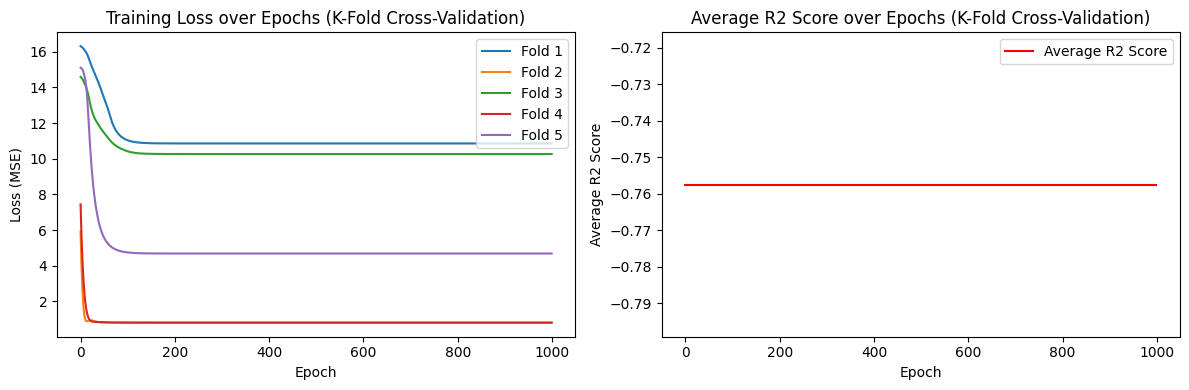

In [2]:
#LeakyRELU, ADAM, Cyclical Learning Rates and Momentum, Cross-Validated:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

class FeedForwardNN:
    def __init__(self, input_dim, hidden_layer_sizes, output_dim):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_dim = output_dim

        self.weights = []
        self.biases = []
        self.activations = [self.leaky_relu] * (len(hidden_layer_sizes) + 1)  # Leaky ReLU for hidden layers

        prev_layer_size = input_dim
        for layer_size in hidden_layer_sizes:
            weight_layer = np.random.randn(prev_layer_size, layer_size)
            bias_layer = np.zeros(layer_size)
            self.weights.append(weight_layer)
            self.biases.append(bias_layer)

            prev_layer_size = layer_size

        # Output layer weights
        weight_output = np.random.randn(prev_layer_size, output_dim)
        bias_output = np.zeros(output_dim)
        self.weights.append(weight_output)
        self.biases.append(bias_output)

    def leaky_relu(self, x, derivative=False):
        alpha = 0.01  # Leaky ReLU parameter
        if derivative:
            return np.where(x > 0, 1.0, alpha)
        return np.where(x > 0, x, alpha * x)

    def forward(self, x):
        layer_input = x
        for i in range(len(self.weights)):
            weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_input = self.activations[i](weighted_sum)
        return layer_input

    def train(self, x, y, initial_learning_rate, num_epochs, decay_rate, momentum):
        num_samples = len(x)
        training_errors = []  # Store training errors
        r2_scores = []  # Store R2 scores
        learning_rate = initial_learning_rate

        beta1 = 0.9  # ADAM parameter
        beta2 = 0.999  # ADAM parameter
        epsilon = 1e-8  # Small constant to prevent division by zero

        m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]
        v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]

        for epoch in range(num_epochs):
            layer_input = x
            layer_outputs = [layer_input]

            for i in range(len(self.weights)):
                weighted_sum = np.dot(layer_input, self.weights[i]) + self.biases[i]
                layer_output = self.activations[i](weighted_sum)
                layer_outputs.append(layer_output)
                layer_input = layer_output

            loss = np.mean((layer_output - y) ** 2)
            training_errors.append(loss)
            
            # Calculate R2 score
            r2 = r2_score(y, layer_output)
            r2_scores.append(r2)

            derror = 2 * (layer_output - y) / num_samples

            for i in range(len(self.weights) - 1, -1, -1):
                dactivation = self.leaky_relu(layer_outputs[i + 1], derivative=True)
                doutput = derror * dactivation
                dweights = np.dot(layer_outputs[i].T, doutput)
                dbiases = np.sum(doutput, axis=0)

                m[i] = (
                    beta1 * m[i][0] + (1 - beta1) * dweights,
                    beta1 * m[i][1] + (1 - beta1) * dbiases
                )
                v[i] = (
                    beta2 * v[i][0] + (1 - beta2) * (dweights ** 2),
                    beta2 * v[i][1] + (1 - beta2) * (dbiases ** 2)
                )

                m_hat_w = m[i][0] / (1 - beta1 ** (epoch + 1))
                m_hat_b = m[i][1] / (1 - beta1 ** (epoch + 1))
                v_hat_w = v[i][0] / (1 - beta2 ** (epoch + 1))
                v_hat_b = v[i][1] / (1 - beta2 ** (epoch + 1))

                self.weights[i] -= (learning_rate / (np.sqrt(v_hat_w) + epsilon)) * m_hat_w
                self.biases[i] -= (learning_rate / (np.sqrt(v_hat_b) + epsilon)) * m_hat_b

                derror = np.dot(doutput, self.weights[i].T)

            # Exponential learning rate decay
            learning_rate *= decay_rate

        return training_errors, r2_scores

def k_fold_cross_validation(x, y, k, input_dim, hidden_layer_sizes, output_dim, initial_learning_rate, num_epochs, decay_rate, momentum):
    num_samples = len(x)
    fold_size = num_samples // k
    training_errors = []
    r2_scores = []
    
    for fold in range(k):
        start_idx = fold * fold_size
        end_idx = (fold + 1) * fold_size
        
        x_train = np.concatenate((x[:start_idx], x[end_idx:]), axis=0)
        y_train = np.concatenate((y[:start_idx], y[end_idx:]), axis=0)
        
        x_val = x[start_idx:end_idx]
        y_val = y[start_idx:end_idx]
        
        model = FeedForwardNN(input_dim, hidden_layer_sizes, output_dim)
        train_errors, r2 = model.train(x_train, y_train, initial_learning_rate, num_epochs, decay_rate, momentum)
        
        training_errors.append(train_errors)
        r2_scores.append(r2_score(y_val, model.forward(x_val)))
    
    return training_errors, r2_scores

# Set up the input and hidden layer sizes, etc.
input_dim = 1
hidden_layer_sizes = [32]
output_dim = 1

# Generate sample data (replace this with your own data)
x = np.random.rand(100, input_dim)
y = 2.0 + 5 * x ** 4 * x + x ** 3 + x ** 2 + 0.1 * np.random.randn(100, output_dim)

# K-fold cross-validation
k = 5
initial_learning_rate = 0.01
num_epochs = 1000
decay_rate = 0.95
momentum = 0.9

training_errors, r2_scores = k_fold_cross_validation(x, y, k, input_dim, hidden_layer_sizes, output_dim, initial_learning_rate, num_epochs, decay_rate, momentum)

# Calculate average training errors and average R2 scores over epochs
avg_training_errors = np.mean(training_errors, axis=0)
avg_r2_scores = np.mean(r2_scores)  # Calculate the average R2 score

# Plot the training progress and average R2 score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for i in range(k):
    plt.plot(range(num_epochs), training_errors[i], label=f"Fold {i + 1}")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs (K-Fold Cross-Validation)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), [avg_r2_scores] * num_epochs, label="Average R2 Score", color='red')
plt.xlabel("Epoch")
plt.ylabel("Average R2 Score")
plt.title("Average R2 Score over Epochs (K-Fold Cross-Validation)")
plt.legend()

plt.tight_layout()
plt.show()

Predictions: [[0.02076836]
 [0.02265957]
 [0.01895087]
 [0.02022718]
 [0.01988244]
 [0.02275632]
 [0.01805688]
 [0.01779785]
 [0.0171564 ]
 [0.01978527]]


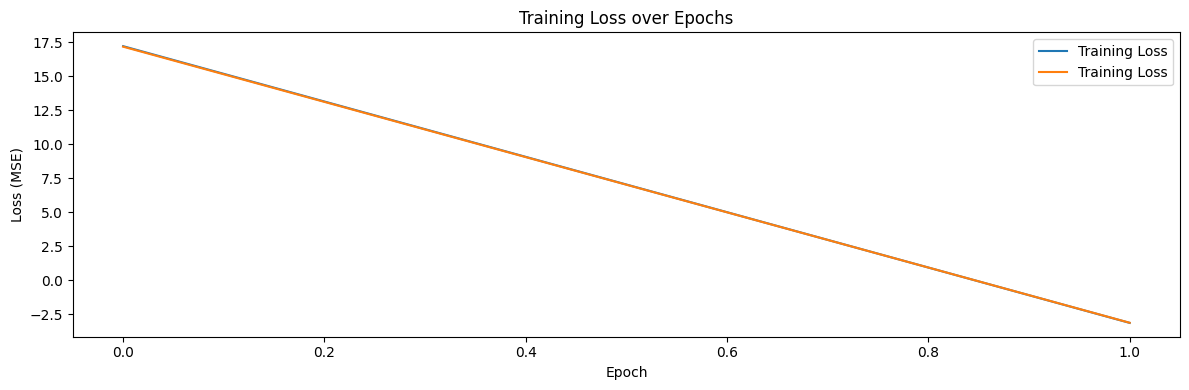